# Requisitos

### Bibliotecas

In [1]:
!pip install numpy
!pip install keybert
!pip install -U scikit-learn
!pip install scikit-learn==0.24.2
!pip install nltk
!pip install rake-nltk
!pip install spacy
!python -m spacy download pt_core_news_md
!pip install gensim
!pip install rank_bm25
!pip install optuna
!pip install seaborn
!pip install kneed
!pip install pydot
!pip install itertools
!pip install networkx
!pip install hdbscan
!pip install pydotplus
!pip install xlsxwriter
!pip install langchain
!pip install -U langchain-community
!pip install bertopic

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.5/7.5 MB 45.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  √ó Preparing metadata (pyproject.toml) did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

√ó Encountered error while generating package metadata.
‚ï∞‚îÄ> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.4/42.4 MB 16.7 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spac

In [2]:
import pandas as pd
import pickle
import nltk
import os
import spacy
import numpy as np
import statistics
import seaborn as sns
import itertools
from pathlib import Path
import sys
from datetime import datetime
import joblib
import pydot
import random
import json
import re
import math
from collections import Counter
import time
import hdbscan
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
from sklearn import metrics
from sklearn.cluster import HDBSCAN, DBSCAN, KMeans, OPTICS, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kneed import KneeLocator
import networkx as nx
from sklearn.metrics import silhouette_score
from networkx.readwrite import json_graph
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from rank_bm25 import BM25Okapi
from rake_nltk import Rake
import optuna
from optuna.storages import RDBStorage
import graphviz
from graphviz import Source
from langchain.llms.ollama import Ollama
from bertopic import BERTopic

from google.colab import files
import warnings
warnings.filterwarnings("ignore")

### Modelos de Sentence Transformers

In [3]:
nltk.download("stopwords")
nltk.download('punkt')
language = 'portuguese'
stopwords = nltk.corpus.stopwords.words(language)

#Portugu√™s
MODEL_ML = "paraphrase-multilingual-MiniLM-L12-v2"
#MODEL_ML = "rufimelo/bert-large-portuguese-cased-sts"
#MODEL_ML = "PORTULAN/serafim-100m-portuguese-pt-sentence-encoder"
#MODEL_ML = "PORTULAN/serafim-900m-portuguese-pt-sentence-encoder"

#Ingl√™s
#MODEL_ML = "all-MiniLM-L6-v2"
#MODEL_ML ="all-mpnet-base-v2"
#MODEL_ML ="multi-qa-mpnet-base-cos-v1"
#MODEL_ML ="gtr-t5-base"
#MODEL_ML ="all-MiniLM-L12-v2"
#MODEL_ML ="gtr-t5-large"

# Todos
#MODELS_ML = [
#    "paraphrase-multilingual-MiniLM-L12-v2",
#    "rufimelo/bert-large-portuguese-cased-sts",
#    "PORTULAN/serafim-100m-portuguese-pt-sentence-encoder",
#    "PORTULAN/serafim-900m-portuguese-pt-sentence-encoder",
#    "all-MiniLM-L6-v2",
#    "all-mpnet-base-v2",
#    "multi-qa-mpnet-base-cos-v1",
#    "gtr-t5-base",
#    "all-MiniLM-L12-v2",
#    "gtr-t5-large"
#]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Par√¢metros

In [4]:
# Algoritmo
algorithm = "kmeans"
#algorithm = "topic_modelling"
# algorithm = "hieraquico"
# algorithm = "dbscan"

# Labelling
labelling = "keyBERT"
# labelling = "verbs"
# labelling = "closest"
# labelling = "bm25"
# labelling = "rake"
#labelling = "llm"

# Datasets de treino
filename = "twitter_final_treino.xlsx"
#filename = "MultiWOZ_DAs_train.csv"

# Datasets de teste
filename_test = "twitter_final_teste.xlsx"
#filename_test = "MultiWOZ_DAs_test.csv"

# M√©trica a otimizar
metric_to_optimize = "silhouette"
#metric_to_optimize = "vmeasure"
#metric_to_optimize = "NONE" #quando damos n√≥s o n√∫mero fixo de clusters para user e para sys

# Valores de Threshold
#threshold = [0, 0.05, 0.1, 0.15, 0.2]
threshold = [0.1]

# Beta V-measure
beta = 1

# N√∫mero de trials para o optuna
n_trials = 5

n_topics = 10
min_topic_size = 2

#Se queremos colocar na label a contagem do n√∫mero de utterances, o turno e tempo por cluster
count_utterances_label = True
turns_label = True
time_start_label = True
time_previous_label = True

#Sentimento do system (True = Transi√ß√µes com sentimento (cor)); False: Transi√ß√µes sem sentimento (a preto))
sentiment_system = True

#sentimento no fluxo (True or False)
sentiment_in_flow = True

# N√∫mero de utterances passadas a considerar para o contexto (1 = sem contexto)
id_max = 1

# URL para o Ollama funcionar
llm_url = "http://localhost:8080"

In [5]:
# Validation
val = {"validation":False, "val_filename":"twitter_final_treino.xlsx", "val_filename_test":"twitter_final_teste.xlsx", "val_model":"all-MiniLM-L6-v2"}

# Fun√ß√µes

### Formata√ß√£o dos dados e vetoriza√ß√£o

In [6]:
def normalize_dataset(df_initial, regex=None, removeGreetings=None, speaker=None):
    """Normalize turn_id by (all turn_id's/max turn_id) and some column names."""
    df = df_initial.copy()

    # Padr√µes para substitui√ß√£o
    url_pattern = r"https?://\S+"
    url_placeholder = "xURLx"
    user_tags_pattern = "@\\S+"
    user_tags_placeholder = "xUSERNAMEx"

    #Renomear as colunas
    if "text" in df.columns:
        df.rename(columns={"text": "utterance"}, inplace=True)

    if "Utterance" in df.columns:
        df.rename(columns={"Utterance": "utterance"}, inplace=True)

    if "transcript" in df.columns:
        df.rename(columns={"transcript": "utterance"}, inplace=True)

    if "Msg" in df.columns:
        df.rename(columns={"Msg": "utterance"}, inplace=True)

    if "intent_title" in df.columns:
        df.rename(columns={"intent_title": "trueLabel"}, inplace=True)

    if "dialog_act" in df.columns:
        df.rename(columns={"dialog_act": "trueLabel"}, inplace=True)

    if "dialogue_act" in df.columns:
        df.rename(columns={"dialogue_act": "trueLabel"}, inplace=True)

    if "speaker" in df.columns:
        df.rename(columns={"speaker": "Speaker"}, inplace=True)

    if "user" in df.columns:
        df.rename(columns={"user": "Speaker"}, inplace=True)

    if "interlocutor" in df.columns:
        df.rename(columns={"interlocutor": "Speaker"}, inplace=True)

    if "trueLabel" in df.columns:
        df["trueLabel"] = df["trueLabel"].replace(" ", "_", regex=True)

    if 'trueLabel' in df.columns:
        df['utterance']= df['utterance'].apply(lambda x: x.lower())

    if 'trueLabel' in df.columns:
        df.trueLabel = df.trueLabel.fillna('none')

    # Substitui√ß√£o de padr√µes usando express√µes regulares
    if regex is True:
        df["utterance"] = df["utterance"].replace(
            to_replace=url_pattern, value=url_placeholder, regex=True
        )
        df["utterance"] = df["utterance"].replace(
            to_replace=user_tags_pattern, value=user_tags_placeholder, regex=True
        )

    if speaker == "both":
        df = df

    if 'Speaker' in df.columns:
        df['Speaker'] = df['Speaker'].replace('USR', 'USER')
        df['Speaker'] = df['Speaker'].replace('Cliente', 'USER')
        df['Speaker'] = df['Speaker'].replace('Visitor', 'USER')
        df['Speaker'] = df['Speaker'].replace('SERVICE', 'SYSTEM')
        df['Speaker'] = df['Speaker'].replace('SYS', 'SYSTEM')
        df['Speaker'] = df['Speaker'].replace('Automaise', 'SYSTEM')
        df['Speaker'] = df['Speaker'].replace('Ajuda', 'SYSTEM')

    df['Speaker'] = df['Speaker'].str.strip()

    # Cria√ß√£o de 'dialogue_id' com base no 'turn_id'
    if 'dialogue_id' not in df.columns and 'turn_id' in df.columns:
        dialog = 0
        result = []
        i_anterior = -1
        for i in df['turn_id']:
            if i_anterior == -1 or i > i_anterior:
                i_anterior = i
            else:
                dialog = dialog + 1
                i_anterior = -1
            result.append(dialog)
        df['dialogue_id'] = result

    # Cria√ß√£o de 'turn_id' com base no 'dialogue_id'
    if 'turn_id' not in df.columns and 'dialogue_id' in df.columns:
        df['turn_id'] = df.groupby('dialogue_id').cumcount()

    #create variable which is a incremental sequence by number of utterances
    df['sequence'] = [i for i in range(len(df))]

    # *** C√°lculo do tempo desde o in√≠cio e desde o turno anterior ***
    if 'date' in df.columns and 'hour' in df.columns:
        # Criar coluna 'datetime' se ainda n√£o existir
        if 'datetime' not in df.columns:
            df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'], format='%d/%m/%Y %H:%M:%S')

        # Calcular 'time_since_start' se a coluna ainda n√£o existir
        if 'time_since_start' not in df.columns:
            df['time_since_start'] = df.groupby('dialogue_id')['datetime'].transform(
                lambda x: (x - x.min()).dt.total_seconds()
            )

        # Calcular 'time_since_previous' se a coluna ainda n√£o existir
        if 'time_since_previous' not in df.columns:
            df['time_since_previous'] = df.groupby('dialogue_id')['datetime'].diff().dt.total_seconds()

            # Preencher o primeiro turno (turno 0) com 0
            df['time_since_previous'] = df['time_since_previous'].fillna(0)

        # Garantir que os valores para o turno 0 estejam corretos
        if 'time_since_start' in df.columns and 'time_since_previous' in df.columns:
            df.loc[df['turn_id'] == 0, ['time_since_start', 'time_since_previous']] = 0

    return df

In [7]:
def compute_weighted_mean(df, id_max=99999, sep=False, opt=1):
    df = df.sort_values(by=['dialogue_id', 'turn_id']).reset_index(drop=True)

    weighted_vectors = [None] * len(df)  # Initialize the list with None to maintain alignment

    if sep:
        grouped = df.groupby(['dialogue_id', 'Speaker'])
    else:
        grouped = df.groupby('dialogue_id')

    for name, group in grouped:
        sum_weighted_vectors = []

        for idx, row in group.iterrows():
            vector = row['vectors']
            if len(sum_weighted_vectors) >= id_max:
                sum_weighted_vectors.pop(0)
            sum_weighted_vectors.append(vector)

            sum_weights = range(1, len(sum_weighted_vectors) + 1)
            if opt == 2:
                weighted_mean_vector = np.concatenate(np.mean(sum_weighted_vectors[:-1], axis=0), sum_weighted_vectors[-1])
            else:
                weighted_mean_vector = sum(sum_weighted_vectors[g] * sum_weights[g] / sum(sum_weights) for g in range(len(sum_weighted_vectors)))
            weighted_vectors[idx] = weighted_mean_vector

    df['vectors_weight'] = weighted_vectors
    return df

In [8]:
def use_sentence_transformer(sentences, model):
    sentences = [str(sentence) if not isinstance(sentence, str) else sentence for sentence in sentences]
    # as frases s√£o codificadas chamando model.encode()
    embeddings = model.encode(sentences)
    vectors = np.array(embeddings)
    return vectors

### Silhouette

In [9]:
#Silhouette Score
def silhouette_method(data, min_k, max_k, incr):
    number_clusters = 0
    atual_silhouette = 0.000
    # Prepare the scaler
    scale = StandardScaler().fit(data)

    # Fit the scaler
    scaled_data = pd.DataFrame(scale.fit_transform(data))

    # Para o m√©todo de silhouette, k precisa come√ßar a partir de 2
    n_clusters_axis = range(min_k, max_k, incr)
    silhouettes = []

    # Ajustar o modelo
    for k in n_clusters_axis:
        kmeans = KMeans(n_clusters=k, init="k-means++", random_state=2)
        kmeans.fit(scaled_data)
        score = metrics.silhouette_score(scaled_data, kmeans.labels_)
        silhouettes.append(score)
        if score > atual_silhouette:
            number_clusters = k
            atual_silhouette = score

    #Gerar o grafo de dispers√£o
    scatter_plot = sns.scatterplot(
        x=n_clusters_axis, y=silhouettes)

    #Usa a fun√ß√£o get_figure e armazena o gr√°fico numa vari√°vel (scatter_fig)
    scatter_fig = scatter_plot.get_figure()

    # Guarda o gr√°fico
    scatter_fig.savefig('scatterplot.png')

    return number_clusters

### Clustering s/Optuna

#### K-means

In [10]:
# Fun√ß√£o para treinar o modelo KMeans e guardar os resultados num ficheiro pickle
def clustering_kmeans(vectors, n_clusters, nomeFichPickle, max_iters=2500):
    # Verifica se o modelo KMeans j√° foi treinado e guardado
    if not os.path.exists(nomeFichPickle):
        # Se o modelo ainda n√£o foi treinado, executar o KMeans
        kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=max_iters, random_state=2)
        kmeans.fit(vectors)

        # Obt√©m r√≥tulos de cluster e centros de cluster
        labels_kmeans = kmeans.labels_
        centers_kmeans = kmeans.cluster_centers_

        # Imprime m√©tricas de avalia√ß√£o interna para KMeans
        print("\nInternal Evaluation:\nSilhouette Score: ", metrics.silhouette_score(vectors, labels_kmeans))
        print("Davies-Bouldin Index (DBI): ", metrics.davies_bouldin_score(vectors, labels_kmeans))

        # Guarda o modelo KMeans treinado num ficheiro pickle
        with open(nomeFichPickle, 'wb') as file:
            pickle.dump((labels_kmeans, centers_kmeans), file)
    else:
        # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
        with open(nomeFichPickle, 'rb') as file:
            labels_kmeans, centers_kmeans = pickle.load(file)

    return labels_kmeans, centers_kmeans


### Topic Modeling

In [11]:
def bertopic_modeling(utterances, model_ml, n_topics, min_topic_size):
    model = BERTopic(embedding_model=model_ml, nr_topics=n_topics)
    topics, probabilities = model.fit_transform(utterances)

    return model, topics, probabilities


### Clustering Optuna

#### Topic Modeling

##### Silhouette

In [12]:
def objective_bertopic(trial, vectors, utterances):
    # Limpeza adicional para garantir que as entradas sejam v√°lidas
    utterances = [str(doc) for doc in utterances if isinstance(doc, str) and doc.strip()]

    # Sugest√£o de par√¢metros
    n_topics = trial.suggest_int("n_topics", 2, 10)
    min_topic_size = trial.suggest_int("min_topic_size", 2, 10)

    # Cria√ß√£o do modelo BERTopic
    topic_model = BERTopic(nr_topics=n_topics, min_topic_size=min_topic_size)

    # Ajuste do modelo aos dados
    topics, probs = topic_model.fit_transform(utterances)

    # C√°lculo do Silhouette Score usando os t√≥picos atribu√≠dos
    silhouette = silhouette_score(vectors, topics)
    return silhouette


def clustering_bertopic_optuna(vectors, utterances, role, metric, nomeFichPickle, n_trials=5):
    labels_topic_model = None
    silhouette_topic_model = None
    n_topics = None
    best_params = None

    # Configurar a base de dados para armazenar trials
    storage_path = "sqlite:///optuna_studies.db"
    storage = RDBStorage(url=storage_path)

    # Limpeza dos utterances para garantir que sejam apenas strings
    cleaned_utterances = [str(doc) for doc in utterances if isinstance(doc, str) and doc.strip()]

    # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            topic_model = pickle.load(file)

            # Precisamos passar os documentos (cleaned_utterances) para get_document_info()
            topics = topic_model.get_document_info(cleaned_utterances)["Topic"]

            silhouette_topic_model = silhouette_score(vectors, topics)
            params = topic_model.get_params()

        print(f"Modelo j√° existente para {role}. Carregando os resultados salvos.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor {metric} Score carregado do pickle para {role}: {silhouette_topic_model}")
    else:
        # Se n√£o existe um modelo salvo, realiza a otimiza√ß√£o com o Optuna
        study = optuna.create_study(direction="maximize", storage=storage)
        study.optimize(lambda trial: objective_bertopic(trial, vectors, cleaned_utterances), n_trials=n_trials)
        best_trial = study.best_trial  # Obt√©m a melhor tentativa

        best_params = best_trial.params
        n_topics = best_params['n_topics']
        min_topic_size = best_params['min_topic_size']

        # Cria√ß√£o do modelo com os melhores par√¢metros
        topic_model = BERTopic(nr_topics=n_topics, min_topic_size=min_topic_size)

        # Ajuste do modelo usando os utterances (texto)
        topics, probs = topic_model.fit_transform(cleaned_utterances)

        silhouette_topic_model = silhouette_score(vectors, topics)

        # Guarda o modelo no ficheiro pickle
        with open(nomeFichPickle, 'wb') as file:
            pickle.dump(topic_model, file)

        print(f"Melhores par√¢metros encontrados para {role} na Fun√ß√£o Silhouette:")
        print(best_params)
        print(f"Melhor Silhouette para {role}: {silhouette_topic_model}")

        labels_topic_model = topics

    return labels_topic_model, silhouette_topic_model, n_topics, best_params


#### K-means


##### Silhouette

In [13]:
#CLUSTERING -> K-MEANS
def objective_kmeans_silhouette(trial, vectors):
    #model_name = trial.suggest_categorical('model_name', MODELS_ML)
    #model_ml = SentenceTransformer(model_name)

    # Codifica as frases usando o modelo selecionado
    #vectors = use_sentence_transformer(utterances, model_ml)

    n_clusters = trial.suggest_int('n_clusters', 3, 10)
    init_method = trial.suggest_categorical('init_method', ['k-means++', 'random'])
    n_init = trial.suggest_int('n_init', 1, 30)
    tol = trial.suggest_float('tol', 1e-4, 1e-1, log=True)
    algorithm = trial.suggest_categorical('algorithm', ['lloyd', 'elkan'])

    kmeans = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        tol=tol,
        algorithm=algorithm,
        random_state=2
    )
    kmeans.fit(vectors)

    silhouette = metrics.silhouette_score(vectors, kmeans.labels_)
    return silhouette


def clustering_kmeans_silhouette_optuna(vectors, role, metric, nomeFichPickle):
    labels_kmeans = None
    centers_kmeans = None
    silhouette_kmeans = None
    n_clusters = None
    best_params = None
    parameters_trial = None
    study = None

    # Configurar a base de dados para armazenar trials
    storage_path = "sqlite:///optuna_studies.db"
    storage = RDBStorage(storage_path)

    # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            kmeans = pickle.load(file)
            print("kmeans", kmeans)
            # labels_kmeans = kmeans['labels']
            labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_
            params = kmeans.get_params()
        silhouette_kmeans = metrics.silhouette_score(vectors, labels_kmeans)
        print(f"Modelo j√° existente para {role}. Carregando os resultados salvos.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor {metric} Score carregado do pickle para {role}: {silhouette_kmeans}")

        if params is not None:
            n_clusters = params["n_clusters"]
    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        study_name = f"study_{role}"
        study = optuna.create_study(
            study_name=study_name,
            storage=storage,
            load_if_exists=True,
            direction="maximize",
        )

        study.optimize(lambda trial: objective_kmeans_silhouette(trial, vectors), n_trials=n_trials)
        best_trial = study.best_trial  # Obt√©m a melhor tentativa

        best_params = best_trial.params
        #model_name = best_params['model_name']
        #model_ml = SentenceTransformer(model_name)
        #vectors = use_sentence_transformer(utterances, model_ml)
        n_clusters = best_params['n_clusters']
        init = best_params['init_method']
        n_init = best_params['n_init']
        tol = best_params['tol']
        algorithm = best_params['algorithm']

        parameters_trial = {
            'n_clusters': n_clusters,
            'init_method': init,
            'n_init': n_init,
            'tol': tol,
            'algorithm': algorithm
        }

        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, tol=tol, algorithm=algorithm, random_state=2)
        kmeans.fit(vectors)

        silhouette_kmeans = metrics.silhouette_score(vectors, kmeans.labels_)

        # Guarda todos os resultados no ficheiro pickle
        with open(nomeFichPickle, 'wb') as file:
            pickle.dump(kmeans, file)

        print(f"Melhores par√¢metros encontrados para {role} na Fun√ß√£o Silhouette:")
        print(best_params)
        print(f"Melhor Silhouette para {role}: {silhouette_kmeans}")

        labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_

    return labels_kmeans, centers_kmeans, silhouette_kmeans, n_clusters, study

##### V-measure

In [14]:
#PARA DIALOGUE ACTS
def objective_kmeans_vmeasure(trial, vectors, normalized_df):
    # Defino os par√¢metros do KMeans a serem otimizados
    n_clusters = trial.suggest_int('n_clusters', 3, 10)
    init_method = trial.suggest_categorical('init_method', ['k-means++', 'random'])
    n_init = trial.suggest_int('n_init', 1, 30)
    tol = trial.suggest_float('tol', 1e-4, 1e-1, log=True)
    algorithm = trial.suggest_categorical('algorithm', ['lloyd', 'elkan'])

    # Configurar kmeans
    kmeans = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        max_iter=1000,
        tol=tol,
        algorithm=algorithm,
        random_state=2
    )
    kmeans.fit(vectors)

    if 'trueLabel' in normalized_df.columns:
        true_labels = []
        pred_labels = []

        for idx in range(len(kmeans.labels_)):
            # Obter o valor da coluna trueLabel para o √≠ndice idx
            true_label_entry = normalized_df.iloc[idx]['trueLabel']

            # Verificar se true_label_entry √© uma string v√°lida
            if isinstance(true_label_entry, str):
                utterance_true_labels = true_label_entry.split(',')
            else:
                raise ValueError(f"O 'trueLabel' na linha {idx} n√£o est√° no formato esperado.")

            cluster_label = kmeans.labels_[idx]

            true_labels.extend(utterance_true_labels)
            pred_labels.extend([cluster_label] * len(utterance_true_labels))

        # Calcular as m√©tricas
        v_measure = metrics.v_measure_score(true_labels, pred_labels, beta=1.0)
        silhouette_score = metrics.silhouette_score(vectors, kmeans.labels_)
        adjusted_rand_score = metrics.adjusted_rand_score(true_labels, pred_labels)
        completeness_score = metrics.completeness_score(true_labels, pred_labels)
        homogeneity_score = metrics.homogeneity_score(true_labels, pred_labels)
        calinski_harabasz_score = metrics.calinski_harabasz_score(vectors, kmeans.labels_)
        davies_bouldin_score = metrics.davies_bouldin_score(vectors, kmeans.labels_)

        # Adicionar os valores calculados aos atributos do trial
        trial.set_user_attr(key='v_measure', value=float(v_measure))
        trial.set_user_attr(key='silhouette_score', value=float(silhouette_score))
        trial.set_user_attr(key='adjusted_rand_score', value=float(adjusted_rand_score))
        trial.set_user_attr(key='completeness_score', value=float(completeness_score))
        trial.set_user_attr(key='homogeneity_score', value=float(homogeneity_score))
        trial.set_user_attr(key='calinski_harabasz_score', value=float(calinski_harabasz_score))
        trial.set_user_attr(key='davies_bouldin_score', value=float(davies_bouldin_score))

        print(f"Trial {trial.number}:")
        #print(f"  Model Name: {model_name}")
        print(f"  Silhouette Score: {silhouette_score}")
        print(f"  V-Measure: {v_measure}")
        print(f"  Adjusted Rand Score: {adjusted_rand_score}")
        print(f"  Completeness Score: {completeness_score}")
        print(f"  Homogeneity Score: {homogeneity_score}")
        print(f"  Calinski-Harabasz Score: {calinski_harabasz_score}")
        print(f"  Davies-Bouldin Score: {davies_bouldin_score}")

        return v_measure
    else:
        silhouette_score = metrics.silhouette_score(vectors, kmeans.labels_)
        print("Como o dataset n√£o est√° anotado, n√£o √© poss√≠vel calcular a V-measure e foi retornada a Silhouette score.")
        return silhouette_score


def clustering_kmeans_vmeasure_optuna(vectors, normalized_df, role, nomeFichPickle, val={}):
    labels_kmeans = None
    centers_kmeans = None
    n_clusters = None
    study = None
    # Configurar a base de dados para armazenar trials
    storage_path = "sqlite:///optuna_studies.db"
    storage = RDBStorage(storage_path)

    # Se o ficheiro pickle n√£o existe, aplicar o optuna
    # Se for para validar configura√ß√µes de um dataset diferente
    if val["validation"]:
        # Colocar path do melhor modelo
        best_model_path = f'models/{val["val_model"]}/{val["val_filename"]}/vmeasure/kmeans_{role}.pkl'
        with open(best_model_path, 'rb') as file:
            kmeans = pickle.load(file)
            labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_

        best_params = kmeans.get_params()
        n_clusters = best_params['n_clusters']
        #max_iters = best_params['max_iters']
        init = best_params['init']
        n_init = best_params['n_init']
        tol = best_params['tol']
        algorithm= best_params['algorithm']

        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, tol=tol, algorithm=algorithm, random_state=2)

        kmeans.fit(vectors)

        silhouette_kmeans = metrics.silhouette_score(vectors, kmeans.labels_)

        with open(nomeFichPickle, 'wb') as file:
            pickle.dump(kmeans, file)

        print(f"Melhores par√¢metros encontrados para {role}:")
        print(best_params)
        print(f"Melhor Silhouette para {role}: {silhouette_kmeans}")
        print(f"Modelo j√° existente para {role}. Carregando os resultados salvos.")
        labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_
    elif os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            kmeans = pickle.load(file)
            print("kmeans", kmeans)
            # labels_kmeans = kmeans['labels']
            labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_
        print(f"Modelo j√° existente para {role}. Carregando os resultados salvos.")
    else:
        study_name = f"study_{role}"
        study = optuna.create_study(
            study_name=study_name,
            storage=storage,
            load_if_exists=True,
            direction="maximize",
        )

        study.optimize(lambda trial: objective_kmeans_vmeasure(trial, vectors, normalized_df), n_trials=n_trials)

        best_trial = study.best_trial
        best_params = best_trial.params
        #model_name = best_params['model_name']
        #model_ml = SentenceTransformer(model_name)
        #vectors = use_sentence_transformer(utterances, model_ml)
        n_clusters = best_params['n_clusters']
        init = best_params['init_method']
        n_init = best_params['n_init']
        tol = best_params['tol']
        algorithm = best_params['algorithm']

        parameters_trial = {
            'n_clusters': n_clusters,
            'init_method': init,
            'n_init': n_init,
            'tol': tol,
            'algorithm': algorithm
        }

        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, tol=tol, algorithm=algorithm, random_state=2)
        kmeans.fit(vectors)

        print(f"Melhores par√¢metros encontrados para {role} na Otimiza√ß√£o da V-measure:")
        print(best_params)

        with open(nomeFichPickle, 'wb') as file:
            pickle.dump(kmeans, file)

        labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_

    return labels_kmeans, centers_kmeans, n_clusters, study

##### Outra m√©trica

In [15]:
#CLUSTERING -> K-MEANS
def objective_kmeans_nova_func(trial, vectors, n_clusters_ant, best_silhouette):
    n_clusters_ideal = 5
    n_clusters = trial.suggest_int('n_clusters', 3, 10)
    init_method = trial.suggest_categorical('init_method', ['k-means++', 'random'])
    n_init = trial.suggest_int('n_init', 1, 30)
    tol = trial.suggest_float('tol', 1e-4, 1e-1, log=True)
    algorithm = trial.suggest_categorical('algorithm', ['lloyd', 'elkan'])
    print("n_clusters 1", n_clusters)

    kmeans = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        tol=tol,
        algorithm=algorithm,
        random_state=2
    )
    kmeans.fit(vectors)

    # Se o num de clusters que vem da fun√ß√£o objetivo da silhouette for igual ao num de clusters ideal (5), passamos o num de clusters ideal para 6
    objective_value = best_silhouette - (math.log(1 + (abs(n_clusters_ant - n_clusters_ideal))) / n_clusters_ideal)

    return objective_value

def clustering_kmeans_nova_func_optuna(vectors, role, metric, nomeFichPickle, n_clusters_ant, best_silhouette):
    labels_kmeans = None
    centers_kmeans = None
    silhouette_kmeans = None
    n_clusters = None
    best_params = None
    parameters_trial = None

    # Se o modelo j√° foi treinado e guardado, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            data = pickle.load(file)
            labels_kmeans, centers_kmeans, params, silhouette_kmeans = data.get('labels'), data.get('centers'), data.get('params'), data.get('silhouette')
        print(f"Modelo j√° existente para {role}. Carregando os resultados salvos.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor Silhouette Score carregado do pickle para {role}: {silhouette_kmeans}")

    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        study = optuna.create_study(direction="maximize")  # Queremos o melhor valor
        objective_func = lambda trial: objective_kmeans_nova_func(trial, vectors, n_clusters_ant, best_silhouette)
        study.optimize(objective_func, n_trials=1)

        best_trial = study.best_trial  # Obt√©m a melhor tentativa

        best_params = best_trial.params
        n_clusters = best_params['n_clusters']
        init = best_params['init_method']
        n_init = best_params['n_init']
        tol = best_params['tol']
        algorithm = best_params['algorithm']

        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, tol=tol, algorithm=algorithm, random_state=2)
        kmeans.fit(vectors)

        silhouette_kmeans = metrics.silhouette_score(vectors, kmeans.labels_)

        with open(nomeFichPickle, 'wb') as file:
            pickle.dump({'labels': kmeans.labels_, 'centers': centers_kmeans, 'params': best_params,'silhouette': silhouette_kmeans}, file)

        print(f"Melhores par√¢metros encontrados para {role} na Nova Fun√ß√£o de Maximiza√ß√£o:")
        print(best_params)
        print(f"Nova Silhouette para {role}: {silhouette_kmeans}")

        labels_kmeans, centers_kmeans = kmeans.labels_, kmeans.cluster_centers_

    return labels_kmeans, centers_kmeans, silhouette_kmeans, n_clusters, best_params


#### HIER√ÅRQUICO

In [16]:
#CLUSTERING -> HIER√ÅRQUICO
def objective_hierarquico_silhouette(trial, vectors):
    n_clusters = trial.suggest_int('n_clusters', 2, 20)
    linkage_method = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

    if linkage_method == 'ward':
        metric = 'euclidean'  # Se a linkage for 'ward', a m√©trica √© sempre 'euclidean'
    else:
        metric = trial.suggest_categorical('metric', ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'])

    hierarchical = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage_method,
        metric=metric
    )
    hierarchical.fit(vectors)

    silhouette = metrics.silhouette_score(vectors, hierarchical.labels_)
    return silhouette


# Fun√ß√£o de clustering Hier√°rquico com Optuna
def clustering_hierarquico_silhouette_optuna(vectors, role, nomeFichPickle):
    labels_hierarchical = None
    study = None
    silhouette_hierarquico = None
    n_clusters = None

    # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            data = pickle.load(file)
            labels_hierarchical, params, silhouette_hierarquico = data.get('labels'), data.get('params'), data.get('silhouette')
        print(f"Modelo j√° existente para {role}. Carregando os resultados guardados.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor Silhouette Score carregado do pickle para {role}: {silhouette_hierarquico}")
    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        # Garante que √© executado at√© que os resultados estejam dispon√≠veis
        while labels_hierarchical is None:
            study = optuna.create_study(direction="maximize")

            objective_func = lambda trial: objective_hierarquico_silhouette(trial, vectors)
            study.optimize(objective_func, n_trials=5)

            best_params = study.best_params
            n_clusters = best_params['n_clusters']
            linkage_method = best_params['linkage']

            hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            hierarchical.fit(vectors)
            silhouette_hierarquico = metrics.silhouette_score(vectors, hierarchical.labels_)

            with open(nomeFichPickle, 'wb') as file:
                pickle.dump({'labels': hierarchical.labels_, 'params': best_params,'silhouette': silhouette_hierarquico}, file)

            print(f"Melhores par√¢metros encontrados para {role} na Fun√ß√£o Silhouette:")
            print(best_params)
            print(f"Melhor Silhouette para {role}: {silhouette_hierarquico}")

            labels_hierarchical = hierarchical.labels_

    return labels_hierarchical, silhouette_hierarquico, n_clusters

##### Outra m√©trica

In [17]:
#CLUSTERING -> HIER√ÅRQUICO
def objective_hierarquico_nova_func(trial, vectors, n_clusters_ant, best_silhouette):
    n_clusters_ideal = 5
    n_clusters = trial.suggest_int('n_clusters', 2, 20)
    linkage_method = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

    if linkage_method == 'ward':
        metric = 'euclidean'  # Se a linkage for 'ward', a m√©trica √© sempre 'euclidean'
    else:
        metric = trial.suggest_categorical('metric', ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'])

    hierarchical = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage_method,
        metric=metric
    )
    hierarchical.fit(vectors)

    objective_value = best_silhouette - (math.log(1 + (abs(n_clusters_ant - n_clusters_ideal))) / n_clusters_ideal)

    return objective_value

def clustering_hierarquico_nova_func_optuna(vectors, role, nomeFichPickle, n_clusters_ant, best_silhouette):
    labels_hierarchical = None
    study = None

    # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            data = pickle.load(file)
            labels_hierarchical, params, silhouette_hierarquico = data.get('labels'), data.get('params'), data.get('silhouette')
            print(f"Modelo j√° existente para {role}. Carregando os resultados guardados.")
            print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
            print(f"Melhor Silhouette Score carregado do pickle para {role}: {silhouette_hierarquico}")
    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        # Garante que √© executado at√© que os resultados estejam dispon√≠veis
        while labels_hierarchical is None:
            study = optuna.create_study(direction="maximize")

            objective_func = lambda trial: objective_hierarquico_nova_func(trial, vectors, n_clusters_ant, best_silhouette)
            study.optimize(objective_func, n_trials=1)

            best_params = study.best_params
            n_clusters = best_params['n_clusters']
            linkage_method = best_params['linkage']

            hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            labels_hierarchical = hierarchical.fit_predict(vectors)
            silhouette_hierarquico = metrics.silhouette_score(vectors, labels_hierarchical)

            with open(nomeFichPickle, 'wb') as file:
                pickle.dump({'labels': labels_hierarchical, 'params': best_params, 'silhouette': silhouette_hierarquico}, file)

            print(f"Melhores par√¢metros encontrados para {role} na Nova Fun√ß√£o de Maximiza√ß√£o:")
            print(best_params)
            print(f"Nova Silhouette para {role}: {silhouette_hierarquico}")

    return labels_hierarchical, silhouette_hierarquico

#### DBSCAN

##### Silhouette

In [18]:
#CLUSTERING -> DBSCAN
def objective_dbscan_silhouette(trial, vectors):
    eps = trial.suggest_float('eps', 0.1, 1.0)
    min_samples = trial.suggest_int('min_samples', 3, 100)
    metric = trial.suggest_categorical('metric', ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)

    if algorithm == 'ball_tree' or algorithm == 'kd_tree' and metric == 'cosine':
        # Se o algoritmo for ball_tree ou kd_tree, a m√©trica n√£o pode ser cosine
        metric = 'euclidean'

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size)
    dbscan.fit(vectors)

    try:
        silhouette = metrics.silhouette_score(vectors, dbscan.labels_)
    except ValueError:
        silhouette = -1.0

    return silhouette

def clustering_dbscan_silhouette_optuna(vectors, nomeFichPickle, role="None"):
    labels_dbscan = None
    study_dbscan = None
    silhouette_dbscan = None
    n_clusters = None
    # Se o modelo j√° foi treinado e guardado, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
        with open(nomeFichPickle, 'rb') as file:
            dbscan = pickle.load(file)
            params = dbscan.get_params()
        silhouette = metrics.silhouette_score(vectors, dbscan.labels_)
        print(f"Modelo j√° existente para {role}. Carregando os resultados guardados.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor Silhouette Score carregado do pickle para {role}: {silhouette_dbscan}")
    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        # Garante que √© executado at√© que os resultados estejam dispon√≠veis
        study_dbscan = optuna.create_study(direction='maximize')

        objective_func = lambda trial: objective_dbscan_silhouette(trial, vectors)
        study_dbscan.optimize(objective_func, n_trials=n_trials)

        best_params = study_dbscan.best_params
        eps = best_params['eps']
        min_samples = best_params['min_samples']
        metric = best_params['metric']
        algorithm = best_params['algorithm']
        leaf_size = best_params['leaf_size']

        if algorithm == 'ball_tree' or algorithm == 'kd_tree' and metric == 'cosine':
            # Se o algoritmo for ball_tree, a m√©trica n√£o pode ser cosine
            metric = 'euclidean'

        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size)
        dbscan.fit(vectors)
        silhouette_dbscan = metrics.silhouette_score(vectors, dbscan.labels_)

        with open(nomeFichPickle, 'wb') as file:
            pickle.dump(dbscan, file)

        print(f"Melhores par√¢metros encontrados para {role} na Fun√ß√£o Silhouette:")
        print(best_params)
        print(f"Melhor Silhouette para {role}: {silhouette_dbscan}")

    labels_dbscan = dbscan.labels_
    n_clusters = len(set(labels_dbscan))

    return labels_dbscan, silhouette_dbscan, n_clusters, study_dbscan

##### V-measure

In [19]:
def objective_dbscan_vmeasure(trial, vectors, normalized_df):

    eps = trial.suggest_float('eps', 0.1, 1.0)
    min_samples = trial.suggest_int('min_samples', 20, 100)
    metric = trial.suggest_categorical('metric', ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)

    if algorithm == 'ball_tree' or algorithm == 'kd_tree' and metric == 'cosine':
        # Se o algoritmo for ball_tree ou kd_tree, a m√©trica n√£o pode ser cosine
        metric = 'euclidean'

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size)
    dbscan.fit(vectors)

    normalized_df = normalized_df.assign(cluster_label=dbscan.labels_)

    try:
        v_measure = metrics.v_measure_score(normalized_df['trueLabel'], normalized_df['cluster_label'], beta=1)
    except ValueError:
        silhouette = -20.0

    return v_measure

# Fun√ß√£o para treinar o modelo DBSCAN e guardar os resultados num ficheiro pickle
def clustering_dbscan_vmeasure_optuna(vectors, nomeFichPickle, normalized_df, role="None"):
    """Receive vectors and do the clustering in DBSCAN (-1 cluster represents outliers)."""
    labels_dbscan = None
    study_dbscan = None
    n_clusters = None
    if not os.path.exists(nomeFichPickle):
        # minsamples, epsilons = get_hyperparameters_dbscan(vectors)
        # best_parameters = get_params_scores(vectors, minsamples, epsilons, pred_n_clusters, nomeFichParam)
        # dbscan = DBSCAN(eps=best_parameters[0], min_samples=best_parameters[1])

        study_dbscan = optuna.create_study(direction="maximize")  # Queremos o melhor silhouette
        objective_func = lambda trial: objective_dbscan_vmeasure(trial, vectors, normalized_df)
        study_dbscan.optimize(objective_func, n_trials=n_trials, gc_after_trial=True)

        best_trial = study_dbscan.best_trial  # Obt√©m a melhor tentativa
        print(best_trial)

        best_params = best_trial.params

        eps=best_params['eps']
        min_samples=best_params['min_samples']
        metric=best_params['metric']

        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        dbscan.fit(vectors)

        print(f"Melhores par√¢metros encontrados para {role}:")
        print(best_params)

        # Save the model to a file
        with open(nomeFichPickle, 'wb') as f:
            pickle.dump(dbscan, f)
            f.close()
    else:
        # Se o modelo j√° foi treinado e salvo, carrega-o do ficheiro pickle
        with open(nomeFichPickle, 'rb') as file:
            dbscan = pickle.load(file)
        print(f"\nModelo j√° existente para {role}. Carregando os resultados salvos.")

    labels_dbscan = dbscan.labels_
    n_clusters = len(set(labels_dbscan))
    return labels_dbscan, n_clusters, study_dbscan

##### Outra m√©trica

In [20]:
#CLUSTERING -> DBSCAN
def objective_dbscan_nova_func(trial, vectors, n_clusters_ant, best_silhouette):
    n_clusters_ideal = 5
    n_clusters_ant = n_clusters_ant if n_clusters_ant else 6  # Se n_clusters_ant √© None, use 6 como valor padr√£o

    eps = trial.suggest_float('eps', 0.1, 1.0)
    min_samples = trial.suggest_int('min_samples', 20, 100)
    metric = trial.suggest_categorical('metric', ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)

    if algorithm == 'ball_tree' or algorithm == 'kd_tree' and metric == 'cosine':
        # Se o algoritmo for ball_tree ou kd_tree, a m√©trica n√£o pode ser cosine
        metric = 'euclidean'

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size)
    dbscan.fit(vectors)

    objective_value = best_silhouette - (math.log(1 + (abs(n_clusters_ant - n_clusters_ideal))) / n_clusters_ideal)

    return objective_value


def clustering_dbscan_nova_func_optuna(vectors, role, nomeFichPickle, n_clusters_ant, best_silhouette):
    labels_dbscan = None
    study_dbscan = None

    # Se o modelo j√° foi treinado e guardado, carrega-o do ficheiro pickle
    if os.path.exists(nomeFichPickle):
        with open(nomeFichPickle, 'rb') as file:
            data = pickle.load(file)
            labels_dbscan, params, silhouette_dbscan = data.get('labels'), data.get('params'), data.get('silhouette')
        print(f"Modelo j√° existente para {role}. Carregando os resultados guardados.")
        print(f"Hiperpar√¢metros carregados do pickle para {role}: {params}")
        print(f"Melhor Silhouette Score carregado do pickle para {role}: {silhouette_dbscan}")
    else:
        # Se o ficheiro pickle n√£o existe, aplica o optuna
        # Garante que √© executado at√© que os resultados estejam dispon√≠veis
        while labels_dbscan is None:
            study_dbscan = optuna.create_study(direction='maximize')

            objective_func = lambda trial: objective_dbscan_nova_func(trial, vectors, n_clusters_ant, best_silhouette)
            study_dbscan.optimize(objective_func, n_trials=n_trials)

            # Obt√©m os melhores par√¢metros sugeridos pelo Optuna
            best_params = study_dbscan.best_params
            eps = best_params['eps']
            min_samples = best_params['min_samples']
            metric = best_params['metric']
            algorithm = best_params['algorithm']
            leaf_size = best_params['leaf_size']

            if algorithm == 'ball_tree' or algorithm == 'kd_tree' and metric == 'cosine':
                # Se o algoritmo for ball_tree, a m√©trica n√£o pode ser cosine
                metric = 'euclidean'

            # Treina o modelo de clustering DBSCAN com os melhores par√¢metros encontrados
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size)
            labels_dbscan = dbscan.fit_predict(vectors)

            # Verifica se o n√∫mero de clusters √© maior que 1
            if len(np.unique(labels_dbscan)) > 1:
                silhouette_dbscan = metrics.silhouette_score(vectors, labels_dbscan)
            else:
                # Se o n√∫mero de clusters for 1, atribui r√≥tulos padr√£o
                labels_dbscan = np.zeros_like(labels_dbscan)
                silhouette_dbscan = -1  #

            with open(nomeFichPickle, 'wb') as file:
                pickle.dump(dbscan, file)

            print(f"Melhores par√¢metros encontrados para {role} na Nova Fun√ß√£o de Maximiza√ß√£o:")
            print(best_params)
            print(f"Nova Silhouette para {role}: {silhouette_dbscan}")

    return labels_dbscan, silhouette_dbscan

##### Predict

In [21]:
# Igual ao kmeans.predict mas para o dbscan
def dbscan_predict(vectors, dbscan_model, new_data):
    y_new = np.ones(shape=len(new_data), dtype=int)*-1

    neigh = NearestNeighbors(n_neighbors=1).fit(vectors[dbscan_model.core_sample_indices_])
    (distances, indices) = neigh.kneighbors(new_data)
    for i, dist  in enumerate(distances):
        if dist < dbscan_model.eps:
            y_new[i] = dbscan_model.labels_[indices[i]]

    return y_new


### Labelling

#### KeyBERT

In [22]:
def describe_clusters_keyBERT(n_clusters, y_predicted, normalized_df, model, stopwords, n_grams, n_entries):
    # Inicializa o modelo KeyBERT
    kw_model = KeyBERT(model=model)

    # Cria um DataFrame vazio para armazenar as labels do cluster e palavras-chave do keyBERT
    df_teste = normalized_df.copy()
    df_teste["predicted"] = y_predicted
    df_teste["utterance"] = df_teste["utterance"].astype(str)

    # Lista para armazenar as labels do cluster e palavras-chave do keyBERT
    list_keyBERT = []
    list_clusters = []  # clusters

    # ids dos clusters, por ordem crescente
    cluster_ids = sorted(list(set(y_predicted)))

    # Percorre os clusters
    for cluster_id in range(n_clusters):
        predicted_df = df_teste[df_teste["predicted"] == cluster_id]
        corpus = predicted_df['utterance']

        corpus = [str(c) for c in corpus]
        #print(corpus)

        # Extrai palavras-chave - KeyBERT
        keywords = kw_model.extract_keywords(" ".join(corpus), keyphrase_ngram_range=(1, n_grams), stop_words=stopwords, highlight=False, top_n=n_entries)
        #print("keywords", keywords)

        # Remove duplicatas das palavras-chave
        keywords_list = [w[0] for w in keywords]
        keywords_set = set(keywords_list)
        keywords_list = list(keywords_set)

        # Adiciona "Outros {cluster_id}" se a lista de palavras-chave estiver vazia
        if not keywords:
            keywords = [(f"Outros {cluster_id}", 1.0)]

        print(f"Cluster {cluster_id} - Keywords: {keywords}")

        # Armazena apenas as palavras-chave e n√£o os scores
        keywords_list = [w[0] for w in keywords]
        list_keyBERT.append(keywords_list)
        list_clusters.append(f"Cluster {cluster_id}")

    # Cria DataFrames a partir das listas e concatena-os
    df1 = pd.DataFrame(list_clusters, columns=["clusters"])
    df2 = pd.DataFrame(list_keyBERT, columns=["labels"])
    df_labels = pd.concat([df1, df2], axis=1)

    print(df_labels)
    return df_labels


#### Verb Phrases

In [23]:
def describe_clusters_verbs(nlp, n_clusters, normalized_df, y_predicted):
    # Cria uma c√≥pia do DataFrame normalizado
    df_teste = normalized_df.copy()
    df_teste["predicted"] = y_predicted

    # Converte as utterances para strings
    df_teste["utterance"] = df_teste["utterance"].astype(str)

    # Listas para armazenar as labels do cluster, verbos e sintagmas
    list_clusters = []
    list_verbs = []
    list_sintagmas = []

    for i, utt in enumerate(list(df_teste["utterance"])):
        doc = nlp(utt)
        sintagma = " "
        for token in doc:
            # Verificar se o token √© uma palavra ou um nome de utilizador
            if token.text[0] >= 'A' and token.text[0] <= 'z' or token.text[0] == '@':
                if token.dep_ == 'ROOT':
                    sintagma = sintagma + " " + token.lemma_
                    for child in token.children:
                         # Verifica se o filho √© uma palavra ou um nome de utilizador e n√£o √© um sujeito
                        if (
                            (child.text[0] >= 'A'
                            and child.text[0] <= 'z' or child.text[0] == '@')
                            and child.dep_ != "nsubj"
                        ):
                            sintagma = sintagma + " " + child.lemma_

        list_sintagmas.append(sintagma)

    # Atualiza as utterances no DataFrame
    df_teste["utterance"] = list_sintagmas
    # Remove linhas com utterances vazias
    df_teste["utterance"].replace(" ", np.nan, inplace=True)
    df_teste.dropna()

    for p in range(n_clusters):
        predicted_df = df_teste[df_teste['predicted'] == p]
        corpus = predicted_df['utterance']

        df_corpus = pd.DataFrame(corpus)
        df_corpus.columns = ['docs_in_cluster']

        # Verificar se a lista n√£o est√° vazia antes de aceder o primeiro elemento
        count_values = df_corpus.value_counts().index.tolist()
        if count_values:
            count_values = count_values[0][0]
        else:
            count_values = "N/A"
        # Adiciona a label do cluster √† lista
        list_clusters.append(f"Cluster {p}")
        # Adiciona contagem de verbos √† lista
        list_verbs.append(count_values)


    # Cria DataFrames a partir das listas e concatena-os
    df1 = pd.DataFrame(list_clusters, columns=["clusters"])
    df2 = pd.DataFrame(list_verbs, columns=["labels"])
    df2["labels"] = df2["labels"].str.cat(
        df2.groupby("labels").cumcount().astype(str).str.replace("0", ""), sep=" "
    )

    df_labels = pd.concat([df1, df2], axis=1)

    print(f"Clusters Verbs: {df_labels}")
    print(f"Labels Verbs: {df_labels['labels'].to_dict()}")

    return df_labels


#### Mais perto do centro

In [24]:
def describe_clusters_closest(normalized_df, y_predicted, vectors, centers, n_clusters):
    docs = normalized_df["utterance"]
    order_centroids = centers.argsort()[:, ::-1]
    closest, _ = metrics.pairwise_distances_argmin_min(
        centers, vectors, metric="cosine"
    )
    print("closest", closest)

    df_teste = pd.DataFrame()  # utterance and y_predicted
    df_teste["predicted"] = y_predicted
    df_teste["corpus"] = normalized_df["utterance"]

    list_clusters = []  # clusters
    list_closest_doc = []  # docs mais proximos do centroide
    for p in range(n_clusters):
        predicted_df = df_teste[df_teste["predicted"] == p]
        corpus = predicted_df["corpus"]

        closest_index = closest[p]
        closest_doc = docs.iloc[closest_index]
        list_closest_doc.append(closest_doc)

        list_clusters.append(f"Cluster {p}")

    df1 = pd.DataFrame(list_clusters, columns=["clusters"])
    df2 = pd.DataFrame(list_closest_doc, columns=["labels"])
    df2["labels"] = df2["labels"].str.cat(
        df2.groupby("labels").cumcount().astype(str).str.replace("0", ""), sep=" "
    )

    df_labels = pd.concat([df1, df2], axis=1)

    print("Cluster Describe Closest Document")
    print(df_labels)
    return df_labels

#### LLM

In [25]:
def describe_clusters_LLM(y_predicted, normalized_df, ollama_url):
    df_teste = normalized_df.copy()
    df_teste["predicted"] = y_predicted
    df_teste["utterance"] = df_teste["utterance"].astype(str)

    # Lista para armazenar as labels do cluster e palavras-chave do LLM
    list_LLM = []
    list_clusters = []  # clusters

    # ids dos clusters, por ordem crescente
    cluster_ids = sorted(list(set(y_predicted)))
    n_clusters = len(cluster_ids)
    not_labelled = [a for a in range(n_clusters)]
    while not_labelled:
        cluster_id = not_labelled[0]
        llm = Ollama(base_url=ollama_url, model="llama3",template='', temperature=0.1, num_predict=50)

        predicted_df = df_teste[df_teste["predicted"] == cluster_id]
        corpus = predicted_df['utterance']

        corpus = [str(c).replace("'","") for c in corpus]
        # Ensure we're not trying to select more strings than are available
        subset_length = min(50, len(corpus))

        # Randomly select exactly 50 utterances
        subset = random.sample(corpus, subset_length)
        #print("corpus", " ".join(corpus))
        prompt = "Please, give a label that captures the main actions of this group of utterances: '"
        prompt_end = "'. Answer with the label only in portuguese, and use this format Label: {your_label}, and use at most three words."
        #subset.insert(0, prompt)
        #subset.insert(-1,prompt_end)
        data = ';'.join(subset)
        response = llm.generate([prompt + data + prompt_end])
        keywords = response.generations[0][0].text
        print(f"Cluster {cluster_id} - Prompt: {prompt + data + prompt_end}")
        print(f"Cluster {cluster_id} - Response: {response}")

        pattern = r"Label:\s*(.+?)(?:[\n.:;,]|$)"
        pattern2 = r"\s*(.+?)(?:[\n.:;,]|$)"

        # Search for the label using the pattern
        label = keywords
        match = re.search(pattern, keywords)

        if match:
            label = match.group(1)
            print("Label:", label)
        elif ':' in keywords:
            partes = keywords.split(':')
            if len(partes) > 1:
                label = partes[1].strip()
                print("Label:", label)
            else:
                print("Label n√£o encontrado ap√≥s os dois pontos.")
                label = "Desconhecido"
        else:
            print("Label n√£o encontrado")
            label = "Desconhecido"

        print(f"Cluster {cluster_id} - Keywords: {label}")
        keywords_list = [label]

        if keywords_list not in list_LLM:
            list_LLM.append(keywords_list)
            list_clusters.append(cluster_id)

            not_labelled.pop(0)
        else:
            old_index = list_LLM.index(keywords_list)
            old_cluster_id = list_clusters[old_index]
            list_LLM.remove(keywords_list)
            list_clusters.pop(old_index)

            not_labelled.pop(0)
            not_labelled.append(old_cluster_id)
            not_labelled.append(cluster_id)

    # Cria DataFrames a partir das listas e concatena-os
    df1 = pd.DataFrame(list_clusters, columns=["clusters"])
    df2 = pd.DataFrame(list_LLM, columns=["labels"])
    df_labels = pd.concat([df1, df2], axis=1).sort_values(by=['clusters'])
    print("Labels: ")
    print(df_labels)
    return df_labels

### Accuracy

In [26]:
def calcular_accuracy_transicoes(normalized_df, flow, names_user, names_system):
    dialogue_ids = normalized_df["dialogue_id"].tolist()

    num_dialogos = len(set(dialogue_ids))  # N√∫mero de di√°logos distintos
    print("num_dialogos", num_dialogos)
    num_utterances = len(normalized_df.index)  # N√∫mero total de utterances
    print("num_utterances", num_utterances)

    transicoes_previstas = 0
    transicoes_totais = 0
    count_inter = 0
    count_eod = 0
    count_sod = 0
    for dialogue_id in set(dialogue_ids): # Percorrer todos os dialogos

        dialogue_utterances = normalized_df[normalized_df["dialogue_id"] == dialogue_id] # Linhas com os dados das utterances do dialogo atual
        dialogue_utterances = dialogue_utterances.sort_values(by='turn_id').reset_index() # Ordenar por turn para obter as transi√ß√µes corretas
        # print(dialogue_utterances)
        # print("Dialogo: ", dialogue_utterances["clusters_final"])

        for i in range(len(dialogue_utterances["clusters_final"])-1): # Percorrer todas as utterances

            # Verificar se User ou System
            if dialogue_utterances['Speaker'][i] == "USER":
                label_atual = names_user[dialogue_utterances["clusters_final"][i]]
            else:
                label_atual = names_system[dialogue_utterances["clusters_final"][i]]

            # Verificar se User ou System
            if dialogue_utterances['Speaker'][i + 1] == "USER":
                label_proximo = names_user[dialogue_utterances["clusters_final"][i + 1]]
            else:
                label_proximo = names_system[dialogue_utterances["clusters_final"][i + 1]]

            # print(label_atual, label_proximo)

            # Se o label das utterances for -1 ent√£o a transi√ß√£o n√£o pode ser prevista
            if dialogue_utterances["clusters_final"][i] == -1 or dialogue_utterances["clusters_final"][i + 1] == -1:
                transicoes_totais += 1
                continue

            # Verificar transi√ß√£o
            if flow.get_edge(("\"" + label_atual + "\""), ("\"" + label_proximo + "\"")):
                count_inter += 1
                transicoes_previstas += 1
            transicoes_totais += 1

        # Verificar que a primeira utterance n√£o tem label -1 e se a transi√ß√£o SOD -> first √© prevista
        if dialogue_utterances["clusters_final"][0] != -1:
            # Verificar se User ou System
            if dialogue_utterances['Speaker'][0] == "USER":
                first_utterance = names_user[dialogue_utterances["clusters_final"][0]]
            else:
                first_utterance = names_system[dialogue_utterances["clusters_final"][0]]

            if flow.get_edge("SOD", ("\"" + first_utterance + "\"")):
                count_sod += 1
                transicoes_previstas += 1

        # Verificar que a ultima utterance n√£o tem label -1 e se a transi√ß√£o last -> EOD √© prevista
        if dialogue_utterances["clusters_final"][len(dialogue_utterances["clusters_final"])-1] != -1:
            # Verificar se User ou System
            if dialogue_utterances['Speaker'][len(dialogue_utterances["clusters_final"])-1] == "USER":
                last_utterance = names_user[dialogue_utterances["clusters_final"][len(dialogue_utterances["clusters_final"])-1]]
            else:
                last_utterance = names_system[dialogue_utterances["clusters_final"][len(dialogue_utterances["clusters_final"])-1]]

            if flow.get_edge(("\"" + last_utterance + "\""), "EOD"):
                count_eod += 1
                transicoes_previstas += 1

        transicoes_totais += 2

    print(count_sod, count_inter, count_eod)
    accuracy = transicoes_previstas / transicoes_totais

    return accuracy


### Guardar valores finais

#### Excel

In [27]:
def save_to_excel(output_file, role, metric, params, objective_value, clusters, create_new_sheet=True):
    # Cria um DataFrame
    data = {
        'Role': [role],
        'Metric': [metric],
        'Parameters': [str(params)],
        'Clusters': [clusters],
        'Objective Value': [objective_value]
    }

    df = pd.DataFrame(data)

    # Tenta ler o ficheiro Excel existente, se n√£o existir, cria um novo
    try:
        existing_df = pd.read_excel(output_file, sheet_name='results')
        df = pd.concat([existing_df, df], ignore_index=True)
    except FileNotFoundError:
        pass

    # Adiciona ou cria uma nova planilha
    with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
        if create_new_sheet or 'results' not in writer.sheets:
            df.to_excel(writer, sheet_name='results', index=False)
        else:
            df.to_excel(writer, sheet_name='results', index=False, startrow=len(existing_df)+1)

# Main

## Treino

### Formata√ß√£o dos dados

In [28]:
# DATA
if filename[-4:] == ".csv":
  dados = pd.read_csv(filename, sep=';')
else:
  dados = pd.read_excel(filename)

#ENTIDADES -> Twitter
#dados = dados[dados['Acc_Query'].str.contains('RTP')]
#dados = dados.loc[dados['Acc_Query'] == 'NOWO']

#Entidades Telecom
#entidades = ['MEO', 'VODAFONE', 'NOWO', 'Altice']
#dados = dados.loc[dados['Acc_Query'].isin(entidades)]

#Entidades TV
#dados = dados[dados['Acc_Query'].isin(['Netflix']) | dados['Acc_Query'].str.contains('RTP')]
#dados['Acc_Query'] = dados['Acc_Query'].str.upper()

normalized_df = normalize_dataset(dados, regex=True, removeGreetings=False, speaker='both')
normalized_df_user = normalized_df[normalized_df['Speaker'] == 'USER']
normalized_df_system = normalized_df[normalized_df['Speaker'] == 'SYSTEM']
utterances_user = normalized_df_user["utterance"].tolist()
utterances_system = normalized_df_system["utterance"].tolist()
utterances = normalized_df["utterance"].tolist()

acts = False
if 'trueLabel' in normalized_df.columns:
  acts = True

### Vetoriza√ß√£o

In [29]:
# EMBEDDING
model_ml = SentenceTransformer(MODEL_ML)

nomeFichVectorsSystem = f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_vectors_system.pkl'
nomeFichVectorsUser = f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_vectors_user.pkl'

if not os.path.exists(nomeFichVectorsSystem) or not os.path.exists(nomeFichVectorsUser):
    #vectors = use_sentence_transformer(utterances, model_ml)
    vectors_user = use_sentence_transformer(utterances_user, model_ml)
    vectors_system = use_sentence_transformer(utterances_system, model_ml)
    vectors = use_sentence_transformer(utterances, model_ml)

    # Contexto
    normalized_df['vectors'] = [vectors[i] for i in range(len(vectors))]
    normalized_df = compute_weighted_mean(normalized_df, id_max)

    normalized_df_user = normalized_df[normalized_df['Speaker'] == 'USER']
    vectors_user = np.vstack(np.array(normalized_df_user['vectors_weight']))

    normalized_df_system = normalized_df[normalized_df['Speaker'] == 'SYSTEM']
    vectors_system = np.vstack(np.array(normalized_df_system['vectors_weight']))


    with open(nomeFichVectorsUser, 'wb') as file:
        pickle.dump(vectors_user, file)

    with open(nomeFichVectorsSystem, 'wb') as file:
        pickle.dump(vectors_system, file)
else:
    with open(nomeFichVectorsUser, 'rb') as file:
        vectors_user = pickle.load(file)

    with open(nomeFichVectorsSystem, 'rb') as file:
        vectors_system = pickle.load(file)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Clustering

In [30]:
excel_user = f'{algorithm}_{filename.split(".")[0]}_user_{metric_to_optimize}_{str(id_max)}.xlsx'
excel_sys = f'{algorithm}_{filename.split(".")[0]}_sys_{metric_to_optimize}_{str(id_max)}.xlsx'

# Ficheiro .pkl onde vai ser guardado os resultados do clustering
nomeFichPickleUser_silh = f'{algorithm}_user_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}.pkl'
nomeFichPickleSystem_silh = f'{algorithm}_sys_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}.pkl'

nomeFichPickleUser_silh_utterances = f'{algorithm}_user_{filename.split(".")[0]}_utt_{metric_to_optimize}_{str(id_max)}.pkl'
nomeFichPickleSystem_silh_utterances = f'{algorithm}_sys_{filename.split(".")[0]}_utt_{metric_to_optimize}_{str(id_max)}.pkl'


def create_clusters_dic(y_predicted, utterances, label):
    clusters_dic = {}  # cluster id -> utterances
    for i, u in enumerate(utterances):
        cid = y_predicted[i]
        if cid not in clusters_dic:
            clusters_dic[cid] = []
        clusters_dic[cid].append(u)

    # Seleciona apenas as 10 primeiras utterances de cada cluster
    clusters_dic = {k: v for k, v in clusters_dic.items()}

    for k, v in clusters_dic.items():
        print(f"Cluster {k} ({label}): {v}")

    return clusters_dic

print('Peek clusters for user...')

if metric_to_optimize == "vmeasure":

    #CLUSTERING PARA USER
    if algorithm == "topicmodeling":
        bertopic_model_user, y_predicted_user, probs_user = bertopic_modeling(utterances_user, model_ml, n_topics=n_topics, min_topic_size=min_topic_size)
    elif algorithm == "dbscan":
        y_predicted_user, n_clusters_user, params_user = clustering_dbscan_vmeasure_optuna(vectors_user, nomeFichPickleUser_silh, normalized_df_user, role='User')
    else:
        # K-means
        y_predicted_user, centers_user, n_clusters_user, params_user = clustering_kmeans_vmeasure_optuna(vectors_user, normalized_df_user, role='User', nomeFichPickle=nomeFichPickleUser_silh, val=val)

    if os.path.exists(nomeFichPickleUser_silh_utterances):
        with open(nomeFichPickleUser_silh_utterances, 'rb') as file:
            data = pickle.load(file)
            for k, v in data.items():
                print(f"Cluster {k} ({'User'}): {v}")
    else:
        clusters_user = create_clusters_dic(y_predicted_user, utterances_user, 'User')
        with open(nomeFichPickleUser_silh_utterances, 'wb') as file:
            pickle.dump(clusters_user, file)
        save_to_excel(excel_user, role='User', metric=metric_to_optimize, params=params_user, objective_value=None, clusters=clusters_user)

    #CLUSTERING PARA SYSTEM
    if algorithm == "topicmodeling":
        bertopic_model_system, y_predicted_system, probs_system = bertopic_modeling(utterances_system, model_ml, n_topics, min_topic_size)
    elif algorithm == "dbscan":
        y_predicted_system, n_clusters_system, params_sys = clustering_dbscan_vmeasure_optuna(vectors_system, nomeFichPickleSystem_silh, normalized_df_system, role='System')
    else:
        #K-means
        #v-measure
        y_predicted_system, centers_system, n_clusters_system, params_sys = clustering_kmeans_vmeasure_optuna(vectors_system, normalized_df_system, role='System', nomeFichPickle=nomeFichPickleSystem_silh,val=val)

    if os.path.exists(nomeFichPickleSystem_silh_utterances):
        with open(nomeFichPickleSystem_silh_utterances, 'rb') as file:
            data = pickle.load(file)
            for k, v in data.items():
                print(f"Cluster {k} ({'System'}): {v}")
    else:
        clusters_system = create_clusters_dic(y_predicted_system, utterances_system, 'System')
        with open(nomeFichPickleSystem_silh_utterances, 'wb') as file:
            pickle.dump(clusters_system, file)
        save_to_excel(excel_sys, role='System', metric=metric_to_optimize, params=params_sys, objective_value=None, clusters=clusters_system)

elif metric_to_optimize == "silhouette":

    #CLUSTERING PARA USER
    if algorithm == "topicmodeling":
        y_predicted_user, metric_user, n_clusters_user, params_user = clustering_bertopic_optuna(vectors_user, utterances=utterances_user, role='User', metric='Silhouette', nomeFichPickle=nomeFichPickleUser_silh)
    elif algorithm == "dbscan":
        y_predicted_user, metric_user, n_clusters_user, params_user = clustering_dbscan_silhouette_optuna(vectors_user, nomeFichPickle=nomeFichPickleUser_silh, role='User')
    else:
        # K-means
        y_predicted_user, centers_user, metric_user, n_clusters_user, params_user = clustering_kmeans_silhouette_optuna(vectors_user, role='User', metric='Silhouette', nomeFichPickle=nomeFichPickleUser_silh)

    if os.path.exists(nomeFichPickleUser_silh_utterances):
        with open(nomeFichPickleUser_silh_utterances, 'rb') as file:
            data = pickle.load(file)
            for k, v in data.items():
                print(f"Cluster {k} ({'User'}): {v}")
    else:
        clusters_user = create_clusters_dic(y_predicted_user, utterances_user, 'User')
        with open(nomeFichPickleUser_silh_utterances, 'wb') as file:
            pickle.dump(clusters_user, file)
        save_to_excel(excel_user, role='User', metric='Silhouette', params=params_user, objective_value=None, clusters=clusters_user)

    #Nova m√©trica
    #y_predicted_user, centers_user, silhouette_user, n_clusters_user, params_user = clustering_kmeans_nova_func_optuna(vectors_user, role='User', metric= 'Nova m√©trica', nomeFichPickle=nomeFichPickleUser_maxim, n_clusters_ant=n_clusters_user, best_silhouette=silhouette_user)
    #clusters_user_nova_metrica = create_clusters_dic(y_predicted_user, utterances_user, 'User', max_utterances=10)
    #print("params_user", params_user)
    #params_user['objective_value'] = objective_kmeans_nova_func(None, vectors_user, n_clusters_user, silhouette_user)
    #save_to_excel(excel_user, role='User', metric='Nova m√©trica', params=params_user, silhouette=silhouette_user, objective_value=params_user['objective_value'], clusters=clusters_user_nova_metrica)

    #Clustering hier√°rquico aglomerativo
    #y_predicted_user, silhouette_user, n_clusters_user = clustering_hierarquico_silhouette_optuna(vectors_user, role='User', nomeFichPickle=nomeFichPickleUser_silh)
    #y_predicted_user, silhouette_user = clustering_hierarquico_nova_func_optuna(vectors_user, role='User', nomeFichPickle=nomeFichPickleUser_maxim, n_clusters_ant=n_clusters_user, best_silhouette=silhouette_user)

    #DBSCAN
    #y_predicted_user, silhouette_user, n_clusters_user = clustering_dbscan_silhouette_optuna(vectors_user, role='User', nomeFichPickle=nomeFichPickleUser_silh)
    #y_predicted_user, silhouette_user = clustering_dbscan_nova_func_optuna(vectors_user, role='User', nomeFichPickle=nomeFichPickleUser_maxim, n_clusters_ant=n_clusters_user, best_silhouette=silhouette_user)

    #CLUSTERING PARA SYSTEM
    if algorithm == "topicmodeling":
        y_predicted_system, metric_sys, n_clusters_system, params_sys = clustering_bertopic_optuna(vectors_system, utterances=utterances_system, role='System', metric='Silhouette', nomeFichPickle=nomeFichPickleSystem_silh)
    elif algorithm == "dbscan":
        y_predicted_system, metric_sys, n_clusters_system, params_sys = clustering_dbscan_silhouette_optuna(vectors_system, nomeFichPickle=nomeFichPickleSystem_silh, role='System')
    else:
        #K-means
        #Silhouette
        y_predicted_system, centers_system, metric_sys, n_clusters_system, params_sys = clustering_kmeans_silhouette_optuna(vectors_system, role='System', metric='Silhouette', nomeFichPickle=nomeFichPickleSystem_silh)

    if os.path.exists(nomeFichPickleSystem_silh_utterances):
        with open(nomeFichPickleSystem_silh_utterances, 'rb') as file:
            data = pickle.load(file)
            for k, v in data.items():
                print(f"Cluster {k} ({'System'}): {v}")
    else:
        clusters_system = create_clusters_dic(y_predicted_system, utterances_system, 'System')
        with open(nomeFichPickleSystem_silh_utterances, 'wb') as file:
            pickle.dump(clusters_system, file)
        save_to_excel(excel_sys, role='System', metric='Silhouette', params=params_sys, objective_value=None, clusters=clusters_system)

    #Nova m√©trica
    #y_predicted_system, centers_system, silhouette_sys, n_clusters_system, params_sys = clustering_kmeans_nova_func_optuna(vectors_system, role='System', metric='Nova m√©trica', nomeFichPickle=nomeFichPickleSystem_maxim, n_clusters_ant=n_clusters_system, best_silhouette=silhouette_sys)
    #clusters_system_nova_metrica = create_clusters_dic(y_predicted_system, utterances_system, 'System', max_utterances=10)
    #print("n_clusters_system", n_clusters_system)
    #save_to_excel(excel_sys, role='System', metric='Nova m√©trica', params=params_sys, silhouette=silhouette_sys, objective_value=params_sys['objective_value'], clusters=clusters_system_nova_metrica)

    #Clustering hier√°rquico aglomerativo
    #y_predicted_system, silhouette_sys, n_clusters_sys = clustering_hierarquico_silhouette_optuna(vectors_system, role='System', nomeFichPickle=nomeFichPickleSystem_silh)
    #y_predicted_system, silhouette_sys = clustering_hierarquico_nova_func_optuna(vectors_system, role='System', nomeFichPickle=nomeFichPickleSystem_maxim, n_clusters_ant=n_clusters_sys, best_silhouette=silhouette_sys)

    #DBSCAN
    #y_predicted_system, silhouette_sys, n_clusters_sys = clustering_dbscan_silhouette_optuna(vectors_system, role='System', nomeFichPickle=nomeFichPickleSystem_silh)
    #y_predicted_system, silhouette_sys = clustering_dbscan_nova_func_optuna(vectors_system, role='System', nomeFichPickle=nomeFichPickleSystem_maxim, n_clusters_ant=n_clusters_sys, best_silhouette=silhouette_sys)

elif metric_to_optimize == 'NONE':
  #nomeFichPickleUser = 'kmeans_user_TWITTER_VODAFON233E33T3232334e23434345.pkl'
  #nomeFichPickleSystem = 'kmeans_System_TWITTER_VODA3233FTO3234233N2434E3534e.pkl'
  n_clusters_user = 6
  n_clusters_system = 6
  y_predicted_user, centers_user = clustering_kmeans(vectors_user, n_clusters_user, nomeFichPickleUser_silh)
  y_predicted_system, centers_system = clustering_kmeans(vectors_system, n_clusters_system, nomeFichPickleSystem_silh)
  #clusters_user_none, n_clusters_user = create_clusters_dic(y_predicted_user, utterances_user, 'User')
  #clusters_system_none, n_clusters_system = create_clusters_dic(y_predicted_system, utterances_system, 'System')

normalized_df_user = normalized_df_user.assign(cluster_user=y_predicted_user)
normalized_df_system = normalized_df_system.assign(cluster_system=y_predicted_system)
df_final = pd.concat([normalized_df_user, normalized_df_system])

# Count the number of utterances in each cluster for the user
user_cluster_counts = normalized_df_user['cluster_user'].value_counts()
print("Counting the number of utterances per cluster - USER:")
print(user_cluster_counts)

# Count the number of utterances in each cluster for the system
system_cluster_counts = normalized_df_system['cluster_system'].value_counts()
print("\nCounting the number of utterances per cluster - SYSTEM:")
print(system_cluster_counts)

Peek clusters for user...


[I 2024-12-30 10:15:15,703] A new study created in RDB with name: study_User
[I 2024-12-30 10:15:15,913] Trial 0 finished with value: 0.40230879187583923 and parameters: {'n_clusters': 4, 'init_method': 'random', 'n_init': 9, 'tol': 0.0005461395806514544, 'algorithm': 'elkan'}. Best is trial 0 with value: 0.40230879187583923.
[I 2024-12-30 10:15:16,192] Trial 1 finished with value: 0.5179693102836609 and parameters: {'n_clusters': 6, 'init_method': 'k-means++', 'n_init': 10, 'tol': 0.00025901695715434107, 'algorithm': 'lloyd'}. Best is trial 1 with value: 0.5179693102836609.
[I 2024-12-30 10:15:16,460] Trial 2 finished with value: 0.6155819296836853 and parameters: {'n_clusters': 10, 'init_method': 'random', 'n_init': 29, 'tol': 0.03525282657839008, 'algorithm': 'elkan'}. Best is trial 2 with value: 0.6155819296836853.
[I 2024-12-30 10:15:16,771] Trial 3 finished with value: 0.5831606984138489 and parameters: {'n_clusters': 8, 'init_method': 'k-means++', 'n_init': 16, 'tol': 0.00043973

Melhores par√¢metros encontrados para User na Fun√ß√£o Silhouette:
{'n_clusters': 10, 'init_method': 'random', 'n_init': 29, 'tol': 0.03525282657839008, 'algorithm': 'elkan'}
Melhor Silhouette para User: 0.6155819296836853
Cluster 8 (User): ['Gostaria de saber a demora da encomenda 111', 'Quanto tempo demora a aguardar stock?', 'Quanto tempo vai demorar a minha encomenda a sair do estado a aguardar stock?', 'Por que a demora?', 'Quanto tempo vai demorar', 'Se a minha encomenda vai demorar']
Cluster 3 (User): ['Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!', 'Compreendi!']
Cluster 0 (User): ['Estado de Encomeda', 'Estado d

[I 2024-12-30 10:15:17,556] Trial 0 finished with value: 0.6810876727104187 and parameters: {'n_clusters': 8, 'init_method': 'k-means++', 'n_init': 15, 'tol': 0.0007276576202994083, 'algorithm': 'lloyd'}. Best is trial 0 with value: 0.6810876727104187.
[I 2024-12-30 10:15:17,728] Trial 1 finished with value: 0.6881908178329468 and parameters: {'n_clusters': 9, 'init_method': 'random', 'n_init': 26, 'tol': 0.07466639355989335, 'algorithm': 'lloyd'}. Best is trial 1 with value: 0.6881908178329468.
[I 2024-12-30 10:15:17,872] Trial 2 finished with value: 0.63360595703125 and parameters: {'n_clusters': 7, 'init_method': 'random', 'n_init': 7, 'tol': 0.0001909426870448271, 'algorithm': 'lloyd'}. Best is trial 1 with value: 0.6881908178329468.
[I 2024-12-30 10:15:18,008] Trial 3 finished with value: 0.6323286890983582 and parameters: {'n_clusters': 9, 'init_method': 'random', 'n_init': 1, 'tol': 0.00015397030275805042, 'algorithm': 'elkan'}. Best is trial 1 with value: 0.6881908178329468.
[I

Melhores par√¢metros encontrados para System na Fun√ß√£o Silhouette:
{'n_clusters': 9, 'init_method': 'random', 'n_init': 26, 'tol': 0.07466639355989335, 'algorithm': 'lloyd'}
Melhor Silhouette para System: 0.6881908178329468
Cluster 3 (System): ['Boa tarde. Os dados pessoais que partilhar s√£o utilizados apenas para lhe prestar esclarecimentos. Para mais informa√ß√µes sobre o tratamento dos seus dados pessoais consulte o ponto 2. da Pol√≠tica de Privacidade. Caso n√£o concorde com o tratamento de dados pessoais, por favor, contacte-nos pelos meios alternativos', 'Por favor selecione a op√ß√£o "Compreendi!" para que o possa come√ßar a ajudar. Os dados pessoais que partilhar s√£o utilizados apenas para lhe prestar esclarecimentos. Para mais informa√ß√µes sobre o tratamento dos seus dados pessoais consulte o ponto 2. da Pol√≠tica de Privacidade. Caso n√£o concorde com o tratamento de dados pessoais, por favor, contacte-nos pelos meios alternativos', 'Ol√°. Os dados pessoais que partilhar

In [31]:
# ------------- M√âDIA DOS TURNOS POR CLUSTER ------------

# Verifica se a coluna `turn_id` e os clusters est√£o devidamente criados

if 'cluster_user' not in df_final.columns or 'turn_id' not in df_final.columns:
    raise ValueError("Colunas necess√°rias (`cluster_user` ou `turn_id`) est√£o ausentes no DataFrame!")

# Cria√ß√£o de uma vers√£o ajustada de 'turn_id', onde os turnos come√ßam em 1 (em vez de 0)
df_adjusted = df_final.copy()
df_adjusted['adjusted_turn_id'] = df_adjusted['turn_id'] + 1  # Incrementa 1 em cada 'turn_id'

# C√°lculo da soma dos turnos por cluster (USER), utilizando a vers√£o ajustada de 'turn_id'
user_cluster_turns = df_adjusted.groupby('cluster_user')['adjusted_turn_id'].sum()

# M√©dia de turnos por fala para cada cluster do USER
user_avg_turns_per_fala = user_cluster_turns / user_cluster_counts

# Desvio padr√£o para turnos por fala por cluster (USER)
user_std_turns_per_fala = df_adjusted.groupby('cluster_user')['adjusted_turn_id'].std()

# Combinar m√©dia e desvio padr√£o
user_stats_turns = user_avg_turns_per_fala.combine(user_std_turns_per_fala, lambda mean, std: f"{mean:.2f} ¬± {std:.2f}")
print("M√©dia turnos ¬± Desvio Padr√£o de turnos para cada cluster (USER):")
print(user_stats_turns)

# C√°lculo da soma dos turnos por cluster para o SYSTEM, utilizando a vers√£o ajustada de 'turn_id'
system_cluster_turns = df_adjusted.groupby('cluster_system')['adjusted_turn_id'].sum()

# M√©dia de turnos por fala para cada cluster do SYSTEM
system_avg_turns_per_fala = system_cluster_turns / system_cluster_counts

# Desvio padr√£o para turnos por fala por cluster para o SYSTEM
system_std_turns_per_fala = df_adjusted.groupby('cluster_system')['adjusted_turn_id'].std()

# Combinar m√©dia e desvio padr√£o para o SYSTEM
system_stats_turns = system_avg_turns_per_fala.combine(system_std_turns_per_fala, lambda mean, std: f"{mean:.2f} ¬± {std:.2f}")
print("M√©dia turnos ¬± Desvio Padr√£o de turnos para cada cluster (SYSTEM):")
print(system_stats_turns)

# ---------------- M√âDIA DO TEMPO DAS FALAS POR CLUSTER -----------------------
# Verificar se as colunas existem no dataset
if 'time_since_start' in df_final.columns and 'time_since_previous' in df_final.columns:

# PARA O USER
    user_avg_time_since_start_per_fala = df_final.groupby('cluster_user')['time_since_start'].mean()
    user_avg_time_since_previous_per_fala = df_final.groupby('cluster_user')['time_since_previous'].mean()

    # Desvio padr√£o dos tempos user
    user_std_time_since_start_per_fala = df_final.groupby('cluster_user')['time_since_start'].std()
    user_std_time_since_previous_per_fala = df_final.groupby('cluster_user')['time_since_previous'].std()

# PARA O SYSTEM
# M√©dia

    system_avg_time_since_start_per_fala = df_final.groupby('cluster_system')['time_since_start'].mean()
    system_avg_time_since_previous_per_fala = df_final.groupby('cluster_system')['time_since_previous'].mean()

    # Desvio padr√£o system
    system_std_time_since_start_per_fala = df_final.groupby('cluster_system')['time_since_start'].std()
    system_std_time_since_previous_per_fala = df_final.groupby('cluster_system')['time_since_previous'].std()

# ------------------- MEDIANA DO TEMPO DAS FALAS POR CLUSTER ---------------------
# Para user
    user_stats = df_final.groupby('cluster_user').agg({
        'time_since_start': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'time_since_previous': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    })

    user_stats.columns = [
        'median_time_since_start',
        'q1_time_since_start',
        'q3_time_since_start',
        'median_time_since_previous',
        'q1_time_since_previous',
        'q3_time_since_previous'
    ]

# Para o sistema
    system_stats = df_final.groupby('cluster_system').agg({
        'time_since_start': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'time_since_previous': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    })

    system_stats.columns = [
        'median_time_since_start',
        'q1_time_since_start',
        'q3_time_since_start',
        'median_time_since_previous',
        'q1_time_since_previous',
        'q3_time_since_previous'
    ]

else:
    print("As colunas 'time_since_start' e 'time_since_previous' n√£o est√£o presentes no dataset.")

silhouette_user = metrics.silhouette_score(vectors_user, y_predicted_user)

silhouette_system = metrics.silhouette_score(vectors_system, y_predicted_system)

M√©dia turnos ¬± Desvio Padr√£o de turnos para cada cluster (USER):
cluster_user
0.0     7.40 ¬± 5.39
1.0    11.16 ¬± 5.13
2.0    10.44 ¬± 5.60
3.0     2.97 ¬± 1.97
4.0    11.30 ¬± 7.44
5.0     9.33 ¬± 2.38
6.0     7.47 ¬± 2.39
7.0    13.33 ¬± 6.53
8.0    13.00 ¬± 5.48
9.0     6.00 ¬± 2.00
dtype: object
M√©dia turnos ¬± Desvio Padr√£o de turnos para cada cluster (SYSTEM):
cluster_system
0.0     6.26 ¬± 2.33
1.0     8.33 ¬± 2.38
2.0     5.48 ¬± 4.85
3.0     1.72 ¬± 1.75
4.0    12.32 ¬± 6.39
5.0    14.09 ¬± 6.12
6.0    12.83 ¬± 5.60
7.0     6.67 ¬± 4.51
8.0    11.95 ¬± 4.46
dtype: object


### Labelling dos clusters

In [32]:
# LABELLING
n_grams = 3
n_entries = 1
nlp = spacy.load('pt_core_news_md')

n_clusters_user = len(set(y_predicted_user))  # Contagem de clusters √∫nicos
n_clusters_system = len(set(y_predicted_system))  # Contagem de clusters √∫nicos

role_user = "user"
role_system = "system"

if labelling == "keyBERT":
    keyBERT_user = describe_clusters_keyBERT(n_clusters_user, y_predicted_user, normalized_df_user, model_ml, stopwords, n_grams, n_entries)
    keyBERT_system = describe_clusters_keyBERT(n_clusters_system, y_predicted_system, normalized_df_system, model_ml, stopwords, n_grams, n_entries)
    labels_type_user = keyBERT_user['labels'].to_dict()
    labels_type_system = keyBERT_system['labels'].to_dict()


#print("keyBERT_user", keyBERT_user)
#print("keyBERT_system", keyBERT_system)
#print("labels_type_user", labels_type_user)
#print("labels_type_system", labels_type_system)

if labelling == "llm":
  LLM_user = describe_clusters_LLM(y_predicted_user,normalized_df_user,llm_url)
  LLM_system = describe_clusters_LLM(y_predicted_system,normalized_df_system,llm_url)
  labels_type_user = LLM_user['labels'].to_dict()
  labels_type_system = LLM_system['labels'].to_dict()

#print("LLM_user", LLM_user)
#print("LLM_system", LLM_system)
#print("labels_type_user", labels_type_user)
#print("labels_type_system", labels_type_system)

#print("centers_user", centers_user)

if labelling == "closest":
  centroide_user = describe_clusters_closest(normalized_df_user, y_predicted_user, vectors_user, centers_user, n_clusters_user)
  centroide_system = describe_clusters_closest(normalized_df_system, y_predicted_system, vectors_system, centers_system, n_clusters_system)
  labels_type_user = centroide_user['labels'].to_dict()
  labels_type_system = centroide_system['labels'].to_dict()

#print("centroide_user", centroide_user)
#print("centroide_system", centroide_system)
#print("labels_type_user", labels_type_user)
#print("labels_type_system", labels_type_system)

if labelling == "verbs":
  verbs_user = describe_clusters_verbs(nlp, n_clusters_user, normalized_df_user, y_predicted_user)
  verbs_system = describe_clusters_verbs(nlp, n_clusters_system, normalized_df_system, y_predicted_system)
  labels_type_user = verbs_user['labels'].to_dict()
  labels_type_system = verbs_system['labels'].to_dict()

Cluster 0 - Keywords: [('estado encomeda estado', 0.6281)]
Cluster 1 - Keywords: [('sim ol√° sim', 0.8216)]
Cluster 2 - Keywords: [('temas outros temas', 0.6453)]
Cluster 3 - Keywords: [('compreendi compreendi compreendi', 0.7331)]
Cluster 4 - Keywords: [('encomendar livros', 0.6655)]
Cluster 5 - Keywords: [('000 000 000', 0.7855)]
Cluster 6 - Keywords: [('111 111 111', 0.8126)]
Cluster 7 - Keywords: [('consigo', 0.4873)]
Cluster 8 - Keywords: [('demora encomenda 111', 0.6303)]
Cluster 9 - Keywords: [('c√≥digo mega outros', 0.8727)]
    clusters                            labels
0  Cluster 0            estado encomeda estado
1  Cluster 1                       sim ol√° sim
2  Cluster 2                temas outros temas
3  Cluster 3  compreendi compreendi compreendi
4  Cluster 4                 encomendar livros
5  Cluster 5                       000 000 000
6  Cluster 6                       111 111 111
7  Cluster 7                           consigo
8  Cluster 8              demora enco

### Construir grafo de transi√ß√µes

In [33]:
#CRIA√á√ÉO DAS INFORMA√á√ïES PARA O GRAFO
# Sentimento no dataset
sentiment = False
sentiment_cluster = None
if "Median_Binary" in df_final.columns:
  sentiment_cluster = 'Median_Binary'

# Garantir que as contagens est√£o ordenadas por √≠ndice de cluster
listLenUser = user_cluster_counts.sort_index().tolist()
listLenSystem = system_cluster_counts.sort_index().tolist()

print("Contagens ordenadas por √≠ndice (User):", listLenUser)
print("Contagens ordenadas por √≠ndice (System):", listLenSystem)

#criar as labels para os clusters
listValuesUsers = (list(labels_type_user.values()))
listValuesSystems = (list(labels_type_system.values()))

#criar as labels para os clusters
# Garantir que os labels estejam na mesma ordem que os √≠ndices dos clusters
labels_type_user_ordered = [labels_type_user[i] for i in sorted(labels_type_user.keys())]
labels_type_system_ordered = [labels_type_system[i] for i in sorted(labels_type_system.keys())]

# Cria√ß√£o das labels finais com as contagens correspondentes
listValuesClusters = []

prefix_user = "user -> "
prefix_system = "sys -> "

if count_utterances_label:
    # User
    for i, user_label in enumerate(labels_type_user_ordered):
        label_with_count = f"{prefix_user}{user_label} ({listLenUser[i]})"

        # Adicionar turnos
        if turns_label:
            label_with_count += (
                f"\nAvg(Turns) {user_avg_turns_per_fala[i]:.2f} ¬± {user_std_turns_per_fala[i]:.2f}"
            )

        # Adicionar tempo desde o in√≠cio
        if time_start_label and 'time_since_start' in df_final.columns:
            median_start = user_stats.loc[i, 'median_time_since_start']
            q1_start = user_stats.loc[i, 'q1_time_since_start']
            q3_start = user_stats.loc[i, 'q3_time_since_start']
            label_with_count += (
                f"\nTime(Start) - Avg {user_avg_time_since_start_per_fala[i]:.2f}s ¬± {user_std_time_since_start_per_fala[i]:.2f}s | "
                f"Mdn {median_start:.2f}s (IQR = {q1_start:.2f}s-{q3_start:.2f}s)"
            )

        # Adicionar tempo desde a fala anterior
        if time_previous_label and 'time_since_previous' in df_final.columns:
            median_previous = user_stats.loc[i, 'median_time_since_previous']
            q1_previous = user_stats.loc[i, 'q1_time_since_previous']
            q3_previous = user_stats.loc[i, 'q3_time_since_previous']
            label_with_count += (
                f"\nTime(Previous) - Avg {user_avg_time_since_previous_per_fala[i]:.2f}s ¬± {user_std_time_since_previous_per_fala[i]:.2f}s | "
                f"Mdn {median_previous:.2f}s (IQR = {q1_previous:.2f}s-{q3_previous:.2f}s)"
            )

        listValuesClusters.append(label_with_count)

    # Sistema
    for i, system_label in enumerate(labels_type_system_ordered):
        label_with_count = f"{prefix_system}{system_label} ({listLenSystem[i]})"

        # Adicionar turnos
        if turns_label:
            label_with_count += (
                f"\nAvg(Turns) {system_avg_turns_per_fala[i]:.2f} ¬± {system_std_turns_per_fala[i]:.2f}"
            )

        # Adicionar tempo desde o in√≠cio
        if time_start_label and 'time_since_start' in df_final.columns:
            median_start = system_stats.loc[i, 'median_time_since_start']
            q1_start = system_stats.loc[i, 'q1_time_since_start']
            q3_start = system_stats.loc[i, 'q3_time_since_start']
            label_with_count += (
                f"\nTime(Start) - Avg {system_avg_time_since_start_per_fala[i]:.2f}s ¬± {system_std_time_since_start_per_fala[i]:.2f}s | "
                f"Mdn {median_start:.2f}s (IQR = {q1_start:.2f}s-{q3_start:.2f}s)"
            )

        # Adicionar tempo desde a fala anterior
        if time_previous_label and 'time_since_previous' in df_final.columns:
            median_previous = system_stats.loc[i, 'median_time_since_previous']
            q1_previous = system_stats.loc[i, 'q1_time_since_previous']
            q3_previous = system_stats.loc[i, 'q3_time_since_previous']
            label_with_count += (
                f"\nTime(Previous) - Avg {system_avg_time_since_previous_per_fala[i]:.2f}s ¬± {system_std_time_since_previous_per_fala[i]:.2f}s | "
                f"Mdn {median_previous:.2f}s (IQR = {q1_previous:.2f}s-{q3_previous:.2f}s)"
            )

        listValuesClusters.append(label_with_count)

else:
    listValuesUsers = list(map(lambda element: prefix_user + "" + element, listValuesUsers))
    listValuesSystems = list(map(lambda element: prefix_system + "" + element, listValuesSystems))
    listValuesClusters = listValuesUsers + listValuesSystems

print("Labels finais com contagens:")
print(listValuesClusters)

Contagens ordenadas por √≠ndice (User): [25, 19, 18, 29, 46, 18, 19, 6, 6, 3]
Contagens ordenadas por √≠ndice (System): [19, 18, 33, 39, 22, 22, 41, 3, 21]
Labels finais com contagens:
['user -> estado encomeda estado (25)\nAvg(Turns) 7.40 ¬± 5.39\nTime(Start) - Avg 651.92s ¬± 2874.42s | Mdn 36.00s (IQR = 8.00s-104.00s)\nTime(Previous) - Avg 7.88s ¬± 7.30s | Mdn 6.00s (IQR = 5.00s-9.00s)', 'user -> sim ol√° sim (19)\nAvg(Turns) 11.16 ¬± 5.13\nTime(Start) - Avg 861.32s ¬± 3290.61s | Mdn 103.00s (IQR = 48.50s-139.00s)\nTime(Previous) - Avg 14.26s ¬± 18.62s | Mdn 8.00s (IQR = 6.50s-13.50s)', 'user -> temas outros temas (18)\nAvg(Turns) 10.44 ¬± 5.60\nTime(Start) - Avg 72.78s ¬± 57.50s | Mdn 86.00s (IQR = 15.00s-111.75s)\nTime(Previous) - Avg 6.72s ¬± 5.36s | Mdn 5.00s (IQR = 4.00s-7.00s)', 'user -> compreendi compreendi compreendi (29)\nAvg(Turns) 2.97 ¬± 1.97\nTime(Start) - Avg 524.76s ¬± 2675.15s | Mdn 7.00s (IQR = 3.00s-27.00s)\nTime(Previous) - Avg 511.24s ¬± 2656.75s | Mdn 5.00s (IQR

In [34]:
names = []
names = listValuesClusters
word1 = 'SOD'
word2 = 'EOD'
ttl = word1 , word2
names.extend(ttl)
# Cria√ß√£o da coluna 'n_clusters_final' com a soma dos clusters atribu√≠dos a USER e SYSTEM
df_final['n_clusters_final']= df_final['cluster_user'].fillna(0) + df_final['cluster_system'].fillna(0)
# Ordena o DataFrame com base na coluna 'sequence'
df_final.sort_values(by=['sequence'], inplace=True)
# Converte a coluna 'n_clusters_final' para o tipo de dados inteiro
df_final['n_clusters_final'] = df_final['n_clusters_final'].astype(int)
#print("df", df_final['n_clusters_final'])
# Incrementa o n√∫mero de clusters atribu√≠dos a SYSTEM aos clusters atribu√≠dos a USER
df_final.loc[df_final['Speaker'] == 'SYSTEM', 'n_clusters_final'] += n_clusters_user

#matriz criada para os dois juntos (system + user)
nClustersBoth = n_clusters_user + n_clusters_system
# N√∫mero total de clusters, incluindo EOD e SOD
numberLabelsMatrix = (nClustersBoth+2) # +2 (EOD & SOD)
# Inicializa uma matriz de ocorr√™ncias com zeros, onde as linhas e colunas representam os clusters (system + user) e mais 2 para EOD e SOD
occurrence_matrix = np.zeros((numberLabelsMatrix, numberLabelsMatrix))
#CRIAR MATRIZ DE OCORR√äNCIAS
#Percorre os di√°logos para criar a matriz de ocorr√™ncias
for i in range(int(normalized_df['dialogue_id'].iat[-1])+1):
    turno_anterior = 0
    fim_dialogo = -1
    # Encontra o cluster inicial do di√°logo
    inicio_dialogo = df_final['n_clusters_final'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == 0)]
    # Incrementa a contagem de ocorr√™ncias entre o cluster nClustersBoth (representando ambos system e user) e o cluster inicial
    occurrence_matrix[nClustersBoth, inicio_dialogo] = occurrence_matrix[nClustersBoth, inicio_dialogo] + 1
    # Percorre os turnos no di√°logo (ignorando o turno inicial)
    for turno in df_final['turn_id'].loc[(df_final.dialogue_id == i) & (df_final.turn_id != 0)]:
        dialogo = df_final['n_clusters_final'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno)]
        # Encontra o cluster anterior
        dialogo_anterior = df_final['n_clusters_final'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno_anterior)]

        # Incrementa a contagem de ocorr√™ncias entre o cluster anterior e o cluster atual
        for d_a, d in zip(dialogo_anterior, dialogo):
            occurrence_matrix[d_a, d] += 1
        turno_anterior = turno
        fim_dialogo = dialogo
    # Incrementa a contagem de ocorr√™ncias entre o √∫ltimo cluster do di√°logo e o cluster nClustersBoth + 1
    occurrence_matrix[fim_dialogo, nClustersBoth+1] = occurrence_matrix[fim_dialogo, nClustersBoth+1]  + 1

#if "prediction" in df_final.columns:
#    df_final['avg_sentiment'] = ''
#    line = 0
#    for n in range(max(df_final['n_clusters_final']) + 1):
#        cluster_df = df_final[df_final['n_clusters_final'] == n]
#        avg_sent = statistics.mean(cluster_df['prediction'])
#        print("avg_sent", avg_sent)
#        df_final['avg_sentiment'][line] = avg_sent
#        line = line + 1
#        df_final.loc[df_final.n_clusters_final == n, 'avg_sentiment'] = avg_sent
#        print("DF_FINAL", df_final.head(10))

def shade_color(color, intensity):
    try:
        named_color = mpl.colors.CSS4_COLORS[color]
        r, g, b = [int(named_color[i:i+2], 16) for i in (1, 3, 5)]
    except KeyError:
        # Supomos que o formato seja RGB
        r, g, b = [int(val) for val in color.split(",")]

    # Ajustar a intensidade para criar tom mais escuro ou mais claro
    r = max(0, min(255, int(r + intensity * (255 - r))))
    g = max(0, min(255, int(g + intensity * (255 - g))))
    b = max(0, min(255, int(b + intensity * (255 - b))))

    # Converter de volta para formato hexadecimal
    return "#{:02X}{:02X}{:02X}".format(r, g, b)

print("sentiment_cluster", sentiment_cluster)

def colorize_sentiment(sentiment, sentiment_in_flow, sentiment_system, df_final, sentiment_cluster):
    # Se o sentimento estiver no fluxo
    if sentiment_in_flow:
        # Se o sentimento do sistema for considerado (sentiment_system == True)
        if sentiment_system:
            # Verifica se os sentimentos originais do sistema foram armazenados e restaura-os
            if 'Original_Sentiment_System' in df_final.columns:
                df_final.loc[df_final['Speaker'] == 'SYSTEM', sentiment_cluster] = df_final['Original_Sentiment_System']
                # Remove a coluna tempor√°ria ap√≥s restaurar os valores originais
                df_final.drop(columns=['Original_Sentiment_System'], inplace=True)

            if pd.notna(sentiment):  # Se o sentimento n√£o for NaN
                sentiment = float(sentiment)

                # Definir cores com base no valor do sentimento
                if sentiment > 0.6:
                    intensity = min(max((sentiment - 0.6) * 2, 0.4), 1.0)
                    intensity = 1 - intensity
                    return shade_color("darkgreen", intensity)
                elif 0.4 <= sentiment <= 0.6:
                    return "gold"
                else:
                    intensity = min(max(sentiment, 0.0), 0.4)
                    return shade_color("darkred", intensity)

        # Caso o sentimento do sistema n√£o seja considerado (sentiment_system == False)
        else:
            # Armazena os sentimentos originais, se ainda n√£o foram armazenados
            if 'Original_Sentiment_System' not in df_final.columns:
                df_final['Original_Sentiment_System'] = df_final[sentiment_cluster]

            # Define o sentimento do sistema como 0
            df_final.loc[df_final['Speaker'] == 'SYSTEM', sentiment_cluster] = 0

            # Se o sentimento for None ou zero
            if pd.isna(sentiment) or sentiment == 0:
                return "black"

            sentiment = float(sentiment)

            # Definir cores com base no valor do sentimento
            if sentiment > 0.6:
                intensity = min(max((sentiment - 0.6) * 2, 0.4), 1.0)
                intensity = 1 - intensity
                return shade_color("darkgreen", intensity)
            elif 0.4 <= sentiment <= 0.6:
                return "gold"
            elif sentiment > 0 and sentiment <= 0.4:
                intensity = min(max(sentiment, 0.0), 0.4)
                return shade_color("darkred", intensity)

    # Se o sentimento n√£o estiver no fluxo ou for None, retorna "black"
    return "black"

if sentiment_cluster in df_final.columns:
  df_final['avg_sentiment'] = ''
  line = 0
  sum_STD = 0
  n_STD = 0
  color_max = []
  color_min = []
  df_final["std_sent_max"] = np.nan
  df_final["std_sent_min"] = np.nan

  for n in range(max(df_final['n_clusters_final']) + 1):
      cluster_df = df_final[df_final['n_clusters_final'] == n]
      avg_sent = statistics.mean(cluster_df[sentiment_cluster])
      if len(cluster_df) > 1:
        std_sent = statistics.stdev(cluster_df[sentiment_cluster])
      else:
        std_sent = avg_sent
      std_max = (avg_sent + std_sent)
      print("std_max", std_max)
      sent_color = colorize_sentiment(std_max, sentiment_in_flow, sentiment_system, df_final, sentiment_cluster)
      color_max.append(sent_color)
      df_final.loc[df_final['n_clusters_final'] == n, "std_sent_max"] = sent_color

      df_final["std_sent_max"][df_final['n_clusters_final'] == n] = sent_color
      std_min = (avg_sent - std_sent)
      sent_color = colorize_sentiment(std_min, sentiment_in_flow, sentiment_system, df_final, sentiment_cluster)
      color_min.append(sent_color)
      df_final.loc[df_final['n_clusters_final'] == n, "std_sent_min"] = sent_color
      df_final["std_sent_min"][df_final['n_clusters_final'] == n] = sent_color
      sum_STD += std_sent
      n_STD += 1

      #Guardar em ficheiros
      with open('Avg_SOD_EOD.txt', 'a') as f:
          f.write("%s Cluster %d STD -> %.2f\n" % (filename, n, std_sent))
      for indice in cluster_df.index:
          df_final['avg_sentiment'].loc[indice] = avg_sent

  avg_STD = sum_STD / n_STD
  with open('Avg_SOD_EOD.txt', 'a') as f:
      f.write("%s -> %s:%.2f \n" % (filename, "AVG STD", avg_STD))

# Encontrar a soma de cada linha
row_sums = occurrence_matrix.sum(axis=1)

# Dividir cada elemento da matriz pela soma correspondente da linha
transition_matrix = np.divide(occurrence_matrix, row_sums[:, np.newaxis])
matrix = pd.DataFrame(transition_matrix, index=names, columns=names)
matrix = matrix.round(decimals = 2)
matrix = matrix.fillna(0.00)
#print("matrix", matrix)

sentiment_cluster Median_Binary
std_max 1.3337317546507323
std_max 1.189256033622022
std_max 1.2055704097242763
std_max 1.2120120791157964
std_max 1.0550981250904106
std_max 1.2055704097242763
std_max 1.2083275925022219
std_max 1.1498299142610593
std_max 0.4831632475943927
std_max 1.2440169358562922
std_max 1.2167395877905722
std_max 1.183110821184699
std_max 1.2828420068241109
std_max 1.2092892324972921
std_max 1.2113478231641435
std_max 1.0397831334664942
std_max 1.2805420027437484
std_max 1.0
std_max 1.2440169358562922


In [35]:
def get_probs_sentiment(dataframe, df_final):
    sentimento_inicio = []
    probabilidade_inicio = []
    sentimento_fim = []
    probabilidade_fim = []

    n_utterances_SOD = 0
    n_utterances_EOD = 0

    for i in dataframe.columns:
      # precisamos de perceber como percorrer tudo. k tem de ser os numeros dos clusters. (se tirarmos o for e os coment√°rios do K, s√≥ acedemos ao K=0 para os i)
      for k in dataframe.columns:
        #k = 0
        flag = 0

        if i == 'SOD':
              df_aux = dataframe['SOD']
              print("df aux SOD", df_aux)
              n_utterances_SOD += df_final[df_final['n_clusters_final'] == k].shape[0]

              for c, p in enumerate(df_aux):
                l = dataframe.columns[c]
                print("c", c, "p", p, "l", l)
                # adicionar probabilidade
                key = 0
                if p > 0.0:
                  probabilidade_inicio.append(p)
                  print("l", l, "\tp", p)
                  # ir buscar o sentimento do cluster associado (no caso do SOD)
                  found = 0
                  for c_u,l_u in labels_type_user.items():
                    print("l_u", l_u, "\nc_u", c_u)
                    if l_u in l:
                        key = c_u
                        found = 1
                        break
                    if found == 0:
                        for c_s,l_s in labels_type_system.items():
                            if l_s in l:
                              key = c_s + len(labels_type_user)
                              break

                sentimento_inicio.append(df_final['avg_sentiment'][df_final['n_clusters_final'] == key].iloc[0])

        if dataframe.columns[k] == 'EOD':
            df_aux = dataframe['EOD']
            print("df aux EOD", df_aux)
            for c, p in enumerate(df_aux):
              key = 0
              # queremos ir buscar a probabilidade de cada transi√ß√£o
              l = dataframe.columns[c]
              print("c", c, "p", p, "l", l)
              # adicionar probabilidade
              if p > 0.0:
                probabilidade_inicio.append(p)
                print("l", l, "\tp", p)
                # ir buscar o sentimento do cluster associado (no caso do SOD)
                found = 0
                for c_u,l_u in labels_type_user.items():
                  print("l_u", l_u, "\nc_u", c_u)
                  if l_u in l:
                      key = c_u
                      found = 1
                      break
                  if found == 0:
                      for c_s,l_s in labels_type_system.items():
                          if l_s in l:
                            key = c_s + len(labels_type_user)
                            break

              n_utterances_EOD += df_final[df_final['n_clusters_final'] == key].shape[0]
              sentimento_fim.append(df_final['avg_sentiment'][df_final['n_clusters_final'] == key].iloc[0])
              #print("sentimento fim", sentimento_fim)

      #k += 1

    return [sentimento_inicio, sentimento_fim, probabilidade_inicio, probabilidade_fim]

def traverse(dataframe, threshold, InputGraph, df_final):
    listi = ['SOD']
    non_visited = []
    visited = ['EOD']

    for c in dataframe.columns:
        non_visited.append(c)
    sentiment_dict = {}

    while len(listi) != 0:
        for i in listi:
            k = 0
            flag = 0
            for j in dataframe.loc[i]:
                if float(j) > threshold:
                    sentiment = None
                    std_max = None
                    std_min = None
                    if i != 'EOD':
                       if sentiment_cluster in df_final.columns:
                           #Tratar do EOD
                           print("entrou aqui wdewe 3")
                           if dataframe.columns[k] == 'EOD':
                              sentiment = None
                              print("i", i)
                              key = 0
                              speaker_c = ''
                              for c,l in labels_type_user.items():
                                  if l in i:
                                     key = c
                                     speaker_c = "cluster_user"
                                     break
                              if speaker_c != "cluster_user":
                                 for c,l in labels_type_system.items():
                                     if l in i:
                                       key = c
                                       speaker_c = "cluster_system"
                                       break
                              aux = df_final[df_final[speaker_c] == key]
                              if not aux.empty:
                                  sentiment = aux.iloc[0]['avg_sentiment']
                                  std_max = aux.iloc[0]['std_sent_max']
                                  std_min = aux.iloc[0]['std_sent_min']
                              else:
                                  # Definir valores padr√£o
                                  sentiment = 0
                                  std_max = 0
                                  std_min = 0
                           else:
                              aux = df_final[df_final['n_clusters_final'] == k]
                              sentiment = aux.iloc[0]['avg_sentiment']
                              std_max =  aux.iloc[0]['std_sent_max']
                              std_min =  aux.iloc[0]['std_sent_min']

                    color = colorize_sentiment(sentiment, sentiment_in_flow, sentiment_system, df_final, sentiment_cluster)

                    InputGraph.add_edge(
                        i, dataframe.columns[k], weight=j, label=j, sentiment=sentiment, color=color, std_max=std_max, std_min=std_min
                    )

                    if dataframe.columns[k] != 'EOD' and dataframe.columns[k] in non_visited and dataframe.columns[k] not in listi:
                        flag = 1
                        listi.append(dataframe.columns[k])

                k += 1

            listi.remove(i)
            non_visited.remove(i)

            if flag == 1:
                visited.append(i)

            if len(listi) == 0:
                return visited

def metrics_approach(G, labels_type_user, labels_type_system):
  probs = [e for e in G.edges.data('label')]
  sentiments = [e for e in G.edges.data('sentiment')]
  print("probs", probs)
  print("sentiments", sentiments)
  sentiment_EOD = []
  sentiment_SOD = []
  probabilidade_EOD = []
  probabilidade_SOD = []
  n_utterances_SOD = []
  n_utterances_EOD = []
  visited_SOD = []
  visited_EOD = []
  n_clusters_EOD = []
  n_clusters_SOD = []
  true_probabilidade_EOD = []
  true_n_utterances_EOD = []
  true_sentiment_EOD = []
  true_n_clusters_EOD = []
  true_visited_EOD = []
  n_utt_eod_anterior = []
  visited_anterior_EOD = []
  n_utt_sod_anterior = []
  n_utt_true_eod_anterior = []
  n_utterances_anterior_EOD = []
  n_clusters_anterior_EOD = []
  n_clusters_anterior_SOD = []
  n_utterances_anterior_SOD = []


  for i, o_value in enumerate(probs):
    sent = sentiments[i][2]
    start = o_value[0]
    end = o_value[1]
    p = o_value[2]

    if start == 'SOD':
      if p == 1.0:
        found = 0
        for c_u,l_u in labels_type_user.items():
          print("l_u", l_u, "\nc_u", c_u)
          if l_u in end:
              key_primeiro = c_u
              found = 1
              break
          if found == 0:
              for c_s,l_s in labels_type_system.items():
                  if l_s in end:
                    key_primeiro = c_s + len(labels_type_user)
                    break

        #n_utt_sod_anterior.append(df_final[df_final['n_clusters_final'] == key_primeiro].shape[0])
        #print("n_utt_sod_anterior", n_utt_sod_anterior)
        for i, value in enumerate(probs):
          sent_after = sentiments[i][2]
          start_after = value[0]
          end_after = value[1]
          p_after = value[2]
          if end == start_after:
            found = 0
            sentiment_SOD.append(sent_after)
            probabilidade_SOD.append(p_after)
            # Vamos buscar num cluster associada aquela label
            for c_u,l_u in labels_type_user.items():
              print("l_u", l_u, "\nc_u", c_u)
              if l_u in end_after:
                  key = c_u
                  found = 1
                  break
              if found == 0:
                  for c_s,l_s in labels_type_system.items():
                      if l_s in end_after:
                        key = c_s + len(labels_type_user)
                        break


            n_utterances_SOD.append(df_final[df_final['n_clusters_final'] == key].shape[0])
            print("n_utterances_SOD", n_utterances_SOD)
            n_utterances_anterior_SOD.append(df_final[df_final['n_clusters_final'] == key_primeiro].shape[0])
            n_clusters_anterior_SOD.append(key_primeiro)

            n_clusters_SOD.append(key)

      else:
        n_utterances_anterior_SOD.append(df_final[df_final['turn_id'] == 0].shape[0])
        print("n_utterances_anterior_SOD", n_utterances_anterior_SOD)
        n_clusters_anterior_SOD.append(-1)

        found = 0
        sentiment_SOD.append(sent)
        probabilidade_SOD.append(p)
        # Vamos buscar num cluster associada aquela label
        for c_u,l_u in labels_type_user.items():
          print("l_u", l_u, "\nc_u", c_u)
          if l_u in end:
              key = c_u
              found = 1
              break
          if found == 0:
              for c_s,l_s in labels_type_system.items():
                  if l_s in end:
                    key = c_s + len(labels_type_user)
                    break

        if key in visited_SOD:
          n_utterances_SOD.append(0)
          n_clusters_SOD.append(key)
          continue

        n_utterances_SOD.append(df_final[df_final['n_clusters_final'] == key].shape[0])
        print("n_utterances_SOD", n_utterances_SOD)
        n_clusters_SOD.append(key)

        visited_SOD.append(key)

    if end == 'EOD':
      for i, value in enumerate(probs):
        sent_after = sentiments[i][2]
        start_after = value[0]
        end_after = value[1]
        p_after = value[2]
        if end_after == start:
          for x, aa_value in enumerate(probs):
            sent_after_after = sentiments[x][2]
            start_after_after = aa_value[0]
            end_after_after = aa_value[1]
            p_after_after = aa_value[2]

            if start_after == end_after_after:
              if [start_after_after, end_after_after] not in visited_EOD:
                found = 0
                sentiment_EOD.append(sent_after_after)
                probabilidade_EOD.append(p_after_after)
                # Vamos buscar num cluster associada aquela label
                for c_u,l_u in labels_type_user.items():
                  #print("l_u", l_u, "\nc_u", c_u)
                  if l_u in end_after_after:
                      key = c_u
                      found = 1
                      break
                  if found == 0:
                      for c_s,l_s in labels_type_system.items():
                          if l_s in end_after_after:
                            key = c_s + len(labels_type_user)
                            break

                n_utterances_EOD.append(df_final[df_final['n_clusters_final'] == key].shape[0])
                n_clusters_EOD.append(key)
                visited_EOD.append([start_after_after, end_after_after])

                found = 0
                # Vamos buscar num cluster associada aquela label
                for c_u,l_u in labels_type_user.items():
                  #print("l_u", l_u, "\nc_u", c_u)
                  if l_u in start_after_after:
                      key = c_u
                      found = 1
                      break
                  if found == 0:
                      for c_s,l_s in labels_type_system.items():
                          if l_s in start_after_after:
                            key = c_s + len(labels_type_user)
                            break

                n_utterances_anterior_EOD.append(df_final[df_final['n_clusters_final'] == key].shape[0])
                n_clusters_anterior_EOD.append(key)

      found = 0
      true_sentiment_EOD.append(sent)
      true_probabilidade_EOD.append(p)
      # Vamos buscar num cluster associada aquela label
      for c_u,l_u in labels_type_user.items():
       # print("l_u", l_u, "\nc_u", c_u)
        if l_u in start:
            key = c_u
            found = 1
            break
        if found == 0:
            for c_s,l_s in labels_type_system.items():
                if l_s in start:
                  key = c_s + len(labels_type_user)
                  break

      if key in true_visited_EOD:
        true_n_utterances_EOD.append(0)
        true_n_clusters_EOD.append(key)
        continue

      true_n_utterances_EOD.append(df_final[df_final['n_clusters_final'] == key].shape[0])
      print("True - n_utterances_EOD", true_n_utterances_EOD)

      true_n_clusters_EOD.append(key)
      true_visited_EOD.append(key)
  #n_utt_true_eod_anterior = sum(n_utterances_EOD)


  n_clusters_sod_visited = []
  for i_cluster_sod, n_cluster_sod in enumerate(n_clusters_anterior_SOD):
    if n_cluster_sod not in n_clusters_sod_visited:
      n_clusters_sod_visited.append(n_cluster_sod)
      n_utt_sod_anterior.append(n_utterances_anterior_SOD[i_cluster_sod])
    else:
      n_clusters_sod_visited.append(n_cluster_sod)
      n_utt_sod_anterior.append(0)
  print("n_clusters_anterior_SOD", n_clusters_anterior_SOD)
  print("n_utt_sod_anterior", n_utt_sod_anterior)

  n_clusters_eod_true_visited = []
  for i_cluster_eod, n_cluster_eod in enumerate(n_clusters_EOD):
    if n_cluster_eod not in n_clusters_eod_true_visited:
      n_clusters_eod_true_visited.append(n_cluster_eod)
      n_utt_true_eod_anterior.append(n_utterances_EOD[i_cluster_eod])
    else:
      n_clusters_eod_true_visited.append(n_cluster_eod)
      n_utt_true_eod_anterior.append(0)
  print("n_utt_true_eod_anterior", n_utt_true_eod_anterior)

  n_clusters_eod_visited = []
  for i_cluster_eod, n_cluster_eod in enumerate(n_clusters_anterior_EOD):
    if n_cluster_eod not in n_clusters_eod_visited:
      n_clusters_eod_visited.append(n_cluster_eod)
      n_utt_eod_anterior.append(n_utterances_anterior_EOD[i_cluster_eod])
    else:
      n_clusters_eod_visited.append(n_cluster_eod)
      n_utt_eod_anterior.append(0)
  print("n_clusters_anterior_eod", n_clusters_anterior_EOD)
  print("n_utt_eod_anterior", n_utt_eod_anterior)

  return sentiment_EOD, sentiment_SOD, probabilidade_EOD, probabilidade_SOD, n_utterances_SOD, n_utterances_EOD, n_clusters_EOD, n_clusters_SOD, true_probabilidade_EOD, true_visited_EOD, true_n_clusters_EOD,  true_sentiment_EOD, true_n_utterances_EOD, n_utt_true_eod_anterior, n_utt_sod_anterior, n_utt_eod_anterior, n_utterances_anterior_SOD, n_clusters_anterior_SOD, n_utterances_anterior_EOD

def dot_with_std(filename):
  with open(filename, "r") as f:
    lines = f.readlines()

  new_lines = []
  transitions = []
  visited = ["EOD", "SOD"]

  n = 0
  for i, line in enumerate(lines):
    if i == 0:
      new_lines.append(line)
      new_lines.append("nodesep=0.5;\nranksep=\"1.2 equally\";")
    if "key" not in line and line != "}\n" and i > 0:
      if "EOD" in line or "SOD" in line:
        # print("new line:", line)
        new_lines.append(line)

    elif "key" in line and line != "}\n":
      # print("original line:\n", line)
      # lines with transition info
      info = line.split("[")
      #print("info", info)
      transition = info[0].strip()
      #print("transition:", transition)
      color = info[1].split("color=")[1].split(",")[0].strip("\"")
      #print("color:", color)
      key = info[1].split(",")[1].split("=")[1]
      #print("key:", key)
      label = info[1].split(",")[2].split("=")[1]
      #print("label:", label)
      sentiment = info[1].split(",")[3].split("=")[1]
      #print("sentiment:", sentiment)
      std_max = info[1].split("std_max=")[1].split(",")[0].strip("\"")
      #print("std_max:", std_max)
      std_min = info[1].split("std_min=")[1].split("]")[0].strip("\"")
      #print("std_min:", std_min)
      weight = info[1].split(",")[2].split("=")[1]
      #print("weight:", weight)
      transition_split = transition.split("\"")
      #print("transition split:",transition_split)

      if "EOD" in transition_split[-1]:
        aux = transition_split[-1].strip().split("->")[1].strip()
        nome_cluster= aux
      # elif "SOD" in transition_split[0]:
      #   aux = transition_split[0].strip().split("->")[0].strip()
      #   nome_cluster = aux
      else:
        nome_cluster = "\"" + transition_split[-2].strip() + "\""

      # se ja criou o cluster, adiciona so a transicao. caso contratio, adiciona a lista de visitados e cria.
      if nome_cluster not in visited:
        visited.append(nome_cluster)
      else:
        transition_line = "\n" + transition + "[color=\"" + color + "\",key=" + key + ",label=" + label + ",sentiment=" + sentiment + ",weight=" + weight + "];"
        transitions.append(transition_line)
        continue

      border = "black"
      # blue or turquoise border
      if "sys" in nome_cluster or "Speaker 2" in nome_cluster:
        border = "blue"
      else:
        border = "turquoise"

      new_line = f"subgraph cluster_" + str(n) + " {\n\tstyle=striped;\n\tcolor=lightgrey;\n\tfillcolor=\"" + std_min + ";.15:" + color + ";.7:" + std_max + "\";\n\tnode [style=filled," + "color=" + border + ",fillcolor=white];\n\t" + nome_cluster + ";\n}"

      transition_line = f"\n" + transition + "[color=\"" + color + "\",key=" + key + ",label=" + label + ",sentiment=" + sentiment + ",weight=" + weight + "];"
      transitions.append(transition_line)

      new_lines.append(new_line)
      n+=1

    elif line == "}\n":

      # print(transitions)
      for t in transitions:
        new_lines.append(t)
        # print("\nnew line:\n", t)

      new_lines.append(line)
      n+=1
  filename_std = filename.split('.')[0] + "_std.dot"

  with open(filename_std, "w") as f:
    for line in new_lines:
      f.write(line)
  return filename_std

# Generate with sentiment
def generate_markov_chain_separately(filename, n_clusters_user: int, n_clusters_system: int, matrix: pd.DataFrame, df_final, threshold) -> nx.MultiDiGraph:
    n_clustersBoth = n_clusters_user + n_clusters_system
    G = nx.MultiDiGraph()
    #threshold = 0.10  # set the threshold value

    matrix = pd.DataFrame(matrix)

    visited = traverse(matrix, threshold, G, df_final)

    # Tirar todos os arcos que passam por n√≥s que n√£o foram visitados
    to_remove = []

    for i in list(G.nodes):
        if i not in visited:
            to_remove.append(i)

    #print("G", G)

    # Adiciona cores aos n√≥s com base na posi√ß√£o no grafo
    colors = []
    for node in G.nodes():
        if node in matrix.columns[:n_clusters_user]:  # nodes for user
            colors.append('turquoise')
        elif node in matrix.columns[n_clusters_user:n_clustersBoth]:  # nodes for system
            colors.append('blue')
        else:  # remaining nodes are blue
            colors.append('orange')
    sum_SOD = 0
    sum_EOD = 0
    n_SOD = 0
    n_EOD = 0
    # Adiciona cores √†s arestas com base no sentimento
    print("SENT", G.edges)
    for edge in G.edges(data=True):
        source, target, attrs = edge
        sentiment = attrs.get('sentiment', 0.0)
        if source == 'SOD':
          sum_SOD += sentiment
          n_SOD += 1
        if target == 'EOD':
          sum_EOD += sentiment
          n_EOD += 1
        color = colorize_sentiment(sentiment, sentiment_in_flow, sentiment_system, df_final, sentiment_cluster)
        G[source][target][0]['color'] = color  # Adiciona a cor √† aresta

    avg_SOD = sum_SOD / n_SOD
    avg_EOD = sum_EOD / n_EOD

    with open('Avg_SOD_EOD.txt', 'a') as f:
        f.write("%s -> %s:%.2f \t %s:%.2f\n" % (filename, "AVG SOD", avg_SOD, "AVG EOD", avg_EOD))

    # Dicion√°rio de atributos de n√≥ do Graphviz com as cores
    node_attrs = {
        node: {'color': colors[i]} for i, node in enumerate(G.nodes())
    }

    nx.set_node_attributes(G, node_attrs)
    return G

# Generate without sentiment
def generate_markov_chain_separately_no(filename, n_clusters_user: int, n_clusters_system: int, matrix: pd.DataFrame, df_final, threshold) -> nx.MultiDiGraph:
    n_clustersBoth = n_clusters_user + n_clusters_system
    G = nx.MultiDiGraph()

    # Convertendo o NumPy array para DataFrame
    matrix = pd.DataFrame(matrix)
    # print(matrix)
    # matrix.to_csv("matrix.csv")
    visited = traverse(matrix, threshold, G, df_final)
    # Tirar todos os arcos que passam por n√≥s que n√£o foram visitados
    to_remove = []

    for i in list(G.nodes):
        if i not in visited:
            to_remove.append(i)

    print(G)
    print(np.array(G.nodes))

    # Adiciona cores aos n√≥s com base na posi√ß√£o no grafo
    colors = []
    for node in G.nodes():
        if node in matrix.columns[:n_clusters_user]:  # nodes for user
            colors.append('turquoise')
        elif node in matrix.columns[n_clusters_user:n_clustersBoth]:  # nodes for system
            colors.append('blue')
        else:  # remaining nodes are blue
            colors.append('orange')

    # Dicion√°rio de atributos de n√≥ do Graphviz com as cores
    node_attrs = {
        node: {'color': colors[i]} for i, node in enumerate(G.nodes())
    }
    nx.set_node_attributes(G, node_attrs)
    return G

def save(graph: nx.MultiDiGraph, variable_name: str) -> str:
    #current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    full_filename = f"{variable_name}_graph.dot"

    # Use write_dot diretamente
    nx.drawing.nx_pydot.write_dot(graph, full_filename)
    print("full_filename", full_filename)

    return full_filename

### Gerar fluxo e calcular m√©tricas (sentimento)

In [36]:
#result = generate_markov_chain_separately(filename, n_clusters_user, n_clusters_system, matrix, df_final)
#print("result", result)

file_result_flow = f'file_resulllttte1eew12ep_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}.pkl'
#file_result_flow = 'file_result_flow_Mastodon_finaal_v2.pkl'
#filename = 'Mastodon.xlsx'

if os.path.exists(file_result_flow):
        with open(file_result_flow, 'rb') as file:
            result_list = pickle.load(file)
            result = result_list[0]
            labels_type_user = result_list[1]
            labels_type_system = result_list[2]
else:
    if sentiment_cluster in df_final.columns:
        result = generate_markov_chain_separately(filename, n_clusters_user, n_clusters_system, matrix, df_final, threshold[0])

        sentiment_EOD, sentiment_SOD, probabilidade_EOD, probabilidade_SOD, n_utterances_SOD, n_utterances_EOD, n_clusters_EOD, n_clusters_SOD, true_probabilidade_EOD, true_visited_EOD, true_n_clusters_EOD,  true_sentiment_EOD, true_n_utterances_EOD, n_utt_true_eod_anterior, n_utt_sod_anterior, n_utt_eod_anterior,  n_utterances_anterior_SOD, n_clusters_anterior_SOD, n_utterances_anterior_EOD = metrics_approach(result, labels_type_user, labels_type_system)
        print("sentiment_EOD", sentiment_EOD)
        print("sentiment_SOD", sentiment_SOD)
        print("probabilidade_SOD", probabilidade_SOD)
        print("probabilidade_EOD", probabilidade_EOD)
        print("n_utterances_SOD", n_utterances_SOD)
        print("n_utterances_EOD", n_utterances_EOD)
        print("n_clusters_EOD", n_clusters_EOD)
        print("n_clusters_SOD", n_clusters_SOD)
        print("true_probabilidade_EOD", true_probabilidade_EOD)
        print("true_visited_EOD", true_visited_EOD)
        print("true_n_clusters_EOD", true_n_clusters_EOD)
        print("true_sentiment_EOD", true_sentiment_EOD)
        print("true_n_utterances_EOD", true_n_utterances_EOD)

        count_neg_utterances = 0
        count_non_neg_utterances = 0
        count_true_neg_utterances = 0
        count_true_non_neg_utterances = 0
        count_start_neg_end_non_neg = 0
        count_true_eod = 0
        count_eod = 0
        count_start_utterances = 0
        count_end_utterances = 0
        count_user_start = 0
        count_user_end = 0
        count_system_start = 0
        count_system_end = 0
        count_user_sod_positivo = 0
        count_user_sod_negativo = 0
        count_sys_sod_positivo = 0
        count_sys_sod_negativo = 0
        count_user_eod_positivo = 0
        count_user_eod_negativo = 0
        count_sys_eod_positivo = 0
        count_sys_eod_negativo = 0
        count_true_system_end = 0
        count_true_user_end = 0
        count_sys_true_eod_positivo = 0
        count_user_true_eod_positivo = 0
        count_sys_true_eod_negativo = 0
        count_user_true_eod_negativo = 0

        for i, value in enumerate(probabilidade_SOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == n_clusters_SOD[i]].iloc[0]
          if speaker == 'USER':
            count_user_start += value * n_utterances_anterior_SOD[i]
            #USER -> Come√ßa bem
            if sentiment_SOD[i] >= 0.4:
              count_user_sod_positivo += value * n_utterances_anterior_SOD[i]
            else: #USER -> Come√ßa mal
              count_user_sod_negativo += value * n_utterances_anterior_SOD[i]
          elif speaker == 'SYSTEM':
            count_system_start += value * n_utterances_anterior_SOD[i]
            if sentiment_SOD[i] >= 0.4:
              #SYS -> Come√ßa bem
              count_sys_sod_positivo += value * n_utterances_anterior_SOD[i]
            else: #SYS -> Come√ßa mal
              count_sys_sod_negativo += value * n_utterances_anterior_SOD[i]

        #N√≥ anterior ao EOD - TRUE EOD
        for i, value in enumerate(true_probabilidade_EOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == true_n_clusters_EOD[i]].iloc[0]
          if speaker == 'USER':
            count_true_user_end += value * n_utt_eod_anterior[i]
            #User -> Acaba bem
            if true_sentiment_EOD[i] >= 0.4:
              count_user_true_eod_positivo += value * n_utt_eod_anterior[i]
            else: #USER -> Acaba mal
              count_user_true_eod_negativo += value * n_utt_eod_anterior[i]
          elif speaker == 'SYSTEM':
            count_true_system_end += value * n_utt_eod_anterior[i]
            if true_sentiment_EOD[i] >= 0.4:
              #SYS -> Acaba bem
              count_sys_true_eod_positivo += value * n_utt_eod_anterior[i]
            else: #SYS -> Acaba mal
              count_sys_true_eod_negativo += value * n_utt_eod_anterior[i]

        #N√≥ pen√∫ltimo ao EOD
        for i, value in enumerate(probabilidade_EOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == n_clusters_EOD[i]].iloc[0]
          if speaker == 'USER':
            count_user_end += value * n_utterances_anterior_EOD[i]
            #User -> Acaba bem
            if sentiment_EOD[i] >= 0.4:
              count_user_eod_positivo += value * n_utterances_anterior_EOD[i]
            else: #USER -> Acaba mal
              count_user_eod_negativo += value * n_utterances_anterior_EOD[i]
          elif speaker == 'SYSTEM':
            count_system_end += value * n_utterances_anterior_EOD[i]
            if sentiment_EOD[i] >= 0.4:
              #SYS -> Acaba bem
              count_sys_eod_positivo += value * n_utterances_anterior_EOD[i]
            else: #SYS -> Acaba mal
              count_sys_eod_negativo += value * n_utterances_anterior_EOD[i]

        #1) Clusters x: x - p1 -> EOD
        #2) Sentimento no fim = soma(p1*p2*sent) em que p2 = utterances em x / total_utterances

        #Percentagem dos que come√ßam bem e acabam mal
        #TRUE (Anterior)

        #Variaveis SOD
        n_utt_user_sod = []
        prob_user_sod = []
        avg_sent_user_sod = []
        n_utt_sys_sod = []
        prob_sys_sod = []
        avg_sent_sys_sod = []
        n_utt_sys_sod_real = []
        all_sys_utterances_sod = 0
        all_user_utterances_sod = 0
        user_sentimento_inicial = 0
        sys_sentimento_inicial = 0
        user_sentimento_inicial_denominador = 0
        user_sentimento_inicial_numerador = 0
        sys_sentimento_inicial_denominador = 0
        sys_sentimento_inicial_numerador = 0
        n_utt_user_sod_anterior = 0
        n_utt_sys_sod_anterior = 0


        #Variaveis EOD
        n_utt_user_eod = []
        prob_user_eod = []
        avg_sent_user_eod = []
        n_utt_sys_eod = []
        prob_sys_eod = []
        avg_sent_sys_eod = []
        all_sys_utterances_eod = 0
        all_user_utterances_eod = 0
        user_sentimento_final = 0
        sys_sentimento_final = 0
        user_sentimento_final_denominador = 0
        user_sentimento_final_numerador = 0
        sys_sentimento_final_denominador = 0
        sys_sentimento_final_numerador = 0
        user_variacao_sentimento = 0
        sys_variacao_sentimento = 0

        #Variaveis TRUE EOD
        true_n_utt_user_eod = []
        true_prob_user_eod = []
        true_avg_sent_user_eod = []
        true_n_utt_sys_eod = []
        true_prob_sys_eod = []
        true_avg_sent_sys_eod = []
        true_all_sys_utterances_eod = 0
        true_all_user_utterances_eod = 0
        true_user_sentimento_final = 0
        true_sys_sentimento_final = 0
        true_user_sentimento_final_denominador = 0
        true_user_sentimento_final_numerador = 0
        true_sys_sentimento_final_denominador = 0
        true_sys_sentimento_final_numerador = 0
        true_user_variacao_sentimento = 0
        true_sys_variacao_sentimento = 0
        sentimento_inicial_numerador = 0
        sentimento_inicial_denominador = 0
        sentimento_final_numerador = 0
        sentimento_final_denominador = 0
        true_sentimento_final_numerador = 0
        true_sentimento_final_denominador = 0
        n_utt_sod = []
        n_utt_eod = []
        prob_sod = []
        prob_eod = []
        avg_sent_sod = []
        avg_sent_eod = []
        true_n_utt_eod = []
        true_prob_eod = []
        true_avg_sent_eod = []

        #Sentimento inicial (SOD)
        for i, value in enumerate(probabilidade_SOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == n_clusters_SOD[i]].iloc[0]

          n_utt_sod.append(n_utterances_SOD[i])
          prob_sod.append(value)
          avg_sent_sod.append(sentiment_SOD[i])

          if speaker == 'USER':
            n_utt_user_sod.append(n_utterances_SOD[i])
            prob_user_sod.append(value)
            avg_sent_user_sod.append(sentiment_SOD[i])

          elif speaker == 'SYSTEM':
            n_utt_sys_sod.append(n_utterances_SOD[i])
            prob_sys_sod.append(value)
            avg_sent_sys_sod.append(sentiment_SOD[i])

        all_user_utterances_sod = sum(n_utt_user_sod)
        all_sys_utterances_sod = sum(n_utt_sys_sod)

        #USER
        try:
          for i, value in enumerate(n_utt_user_sod):
            user_sentimento_inicial_numerador += n_utt_sod_anterior[i] * prob_user_sod[i] + avg_sent_user_sod[i] * value
            user_sentimento_inicial_denominador += value + n_utt_sod_anterior[i]
          user_sentimento_inicial = user_sentimento_inicial_numerador / user_sentimento_inicial_denominador
        except:
          user_sentimento_inicial = -1

        print("Sentimento inicial USER", user_sentimento_inicial)

        #SYSTEM
        try:
          for i, value in enumerate(n_utt_sys_sod):
            sys_sentimento_inicial_numerador += n_utt_sod_anterior[i] * prob_sys_sod[i] + avg_sent_sys_sod[i] * value
            sys_sentimento_inicial_denominador += value + n_utt_sod_anterior[i]
          sys_sentimento_inicial = sys_sentimento_inicial_numerador/sys_sentimento_inicial_denominador
        except:
          sys_sentimento_inicial = -1

        print("Sentimento inicial SYS", sys_sentimento_inicial)

        #TOTAL
        try:
          for i, value in enumerate(n_utt_sod):
            sentimento_inicial_numerador += n_utt_sod_anterior[i] * prob_sod[i] + avg_sent_sod[i] * value
            sentimento_inicial_denominador += value + n_utt_sod_anterior[i]
          sentimento_inicial = sentimento_inicial_numerador / sentimento_inicial_denominador
        except:
          sentimento_inicial = -1

        print("Sentimento inicial TOTAL", sentimento_inicial)

        #Sentimento final (EOD)
        for i, value in enumerate(probabilidade_EOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == n_clusters_EOD[i]].iloc[0]

          n_utt_eod.append(n_utterances_EOD[i])
          prob_eod.append(value)
          avg_sent_eod.append(sentiment_EOD[i])

          if speaker == 'USER':
            n_utt_user_eod.append(n_utterances_EOD[i])
            prob_user_eod.append(value)
            avg_sent_user_eod.append(sentiment_EOD[i])

          elif speaker == 'SYSTEM':
            n_utt_sys_eod.append(n_utterances_EOD[i])
            prob_sys_eod.append(value)
            avg_sent_sys_eod.append(sentiment_EOD[i])

        all_user_utterances_eod = sum(n_utt_user_eod)
        all_sys_utterances_eod = sum(n_utt_sys_eod)

        #USER
        try:
          for i, value in enumerate(n_utt_user_eod):
            user_sentimento_final_numerador += n_utt_eod_anterior[i] * prob_user_eod[i] + avg_sent_user_eod[i] * value
            user_sentimento_final_denominador += value + n_utt_eod_anterior[i]
          user_sentimento_final = user_sentimento_final_numerador/user_sentimento_final_denominador
        except:
          user_sentimento_final = -1

        print("Sentimento final USER", user_sentimento_final)

        #SYSTEM
        try:
          for i, value in enumerate(n_utt_sys_eod):
            sys_sentimento_final_numerador += n_utt_eod_anterior[i] * prob_sys_eod[i] + avg_sent_sys_eod[i] * value
            sys_sentimento_final_denominador += value + n_utt_eod_anterior[i]
          sys_sentimento_final = sys_sentimento_final_numerador/sys_sentimento_final_denominador
        except:
          sys_sentimento_final = -1

        print("Sentimento final SYSTEM", sys_sentimento_final)

        #TOTAL
        try:
          for i, value in enumerate(n_utt_eod):
            sentimento_final_numerador += n_utt_eod_anterior[i] * prob_eod[i] + avg_sent_eod[i] * value
            sentimento_final_denominador += value + n_utt_eod_anterior[i]
          sentimento_final = sentimento_final_numerador/sentimento_final_denominador
        except:
          sentimento_final = -1

        print("Sentimento final TOTAL", sentimento_final)


        #TRUE EOD
        for i, value in enumerate(true_probabilidade_EOD):
          speaker = df_final['Speaker'][df_final['n_clusters_final'] == true_n_clusters_EOD[i]].iloc[0]

          true_n_utt_eod.append(true_n_utterances_EOD[i])
          true_prob_eod.append(value)
          true_avg_sent_eod.append(true_sentiment_EOD[i])

          if speaker == 'USER':
            true_n_utt_user_eod.append(true_n_utterances_EOD[i])
            true_prob_user_eod.append(value)
            true_avg_sent_user_eod.append(true_sentiment_EOD[i])

          elif speaker == 'SYSTEM':
            true_n_utt_sys_eod.append(true_n_utterances_EOD[i])
            true_prob_sys_eod.append(value)
            true_avg_sent_sys_eod.append(true_sentiment_EOD[i])

        true_all_user_utterances_eod = sum(true_n_utt_user_eod)
        true_all_sys_utterances_eod = sum(true_n_utt_sys_eod)

        true_all_utterances_eod_user = 0
        for i, value in enumerate(true_n_utt_user_eod):
          true_all_utterances_eod_user += value *  true_prob_user_eod[i]

        true_all_utterances_eod_sys = 0
        for i, value in enumerate(true_n_utt_sys_eod):
          true_all_utterances_eod_sys += value *  true_prob_sys_eod[i]

        true_all_utterances_eod = 0
        for i, value in enumerate(true_n_utt_eod):
          true_all_utterances_eod += value *  true_prob_eod[i]


        #USER
        try:
          for i, value in enumerate(true_n_utt_user_eod):
            #Prof Ana
            #true_user_sentimento_final_numerador += n_utt_true_eod_anterior[i] * true_prob_user_eod[i] + true_avg_sent_user_eod[i] * value
            #true_user_sentimento_final_denominador += value + n_utt_true_eod_anterior[i]
            #Prof Hugo (ultima sugest√£o)
            #true_user_sentimento_final_numerador += value * true_prob_user_eod[i] + true_avg_sent_user_eod[i] * value
            #true_user_sentimento_final_denominador += 2 * (value * true_prob_user_eod[i])
            true_user_sentimento_final_numerador += value * true_prob_user_eod[i] + true_avg_sent_user_eod[i] * true_all_utterances_eod_user
            true_user_sentimento_final_denominador += value + true_all_utterances_eod_user
          true_user_sentimento_final = true_user_sentimento_final_numerador/true_user_sentimento_final_denominador
        except:
          true_user_sentimento_final = -1

        print("TRUE Sentimento final USER", true_user_sentimento_final)

        #SYSTEM
        try:
          for i, value in enumerate(true_n_utt_sys_eod):
            #Prof Ana
            #true_sys_sentimento_final_numerador += n_utt_true_eod_anterior[i] * true_prob_sys_eod[i] + true_avg_sent_sys_eod[i] * value
            #true_sys_sentimento_final_denominador += value + n_utt_true_eod_anterior[i]
            #Prof Hugo
            #true_sys_sentimento_final_numerador += value * true_prob_sys_eod[i] + true_avg_sent_sys_eod[i] * value
            #true_sys_sentimento_final_denominador += 2 * (value + n_utt_true_eod_anterior[i])
            true_sys_sentimento_final_numerador += value * true_prob_sys_eod[i] + true_avg_sent_sys_eod[i] * true_all_utterances_eod_sys
            true_sys_sentimento_final_denominador += value + true_all_utterances_eod_sys
          true_sys_sentimento_final = true_sys_sentimento_final_numerador/true_sys_sentimento_final_denominador
        except:
          true_sys_sentimento_final = -1

        print("TRUE Sentimento final SYSTEM", true_sys_sentimento_final)

        #TOTAL
        try:
          for i, value in enumerate(true_n_utt_eod):
            true_sentimento_final_numerador += value * true_prob_eod[i] + true_avg_sent_eod[i] * true_all_utterances_eod
            true_sentimento_final_denominador += value + true_all_utterances_eod
          true_sentimento_final = true_sentimento_final_numerador/true_sentimento_final_denominador
        except:
          true_sentimento_final = -1

        print("TRUE Sentimento final TOTAL", true_sentimento_final)

        #-----------------------------------------------------

        #if true_user_sentimento_final == 0.0 or true_user_sentimento_final == -1:
        #  true_user_sentimento_final = user_sentimento_final

        #if user_sentimento_final == 0.0 or user_sentimento_final == -1:
        #  user_sentimento_final = true_user_sentimento_final

        #if true_sys_sentimento_final == 0.0 or true_sys_sentimento_final == -1:
        #  true_sys_sentimento_final = sys_sentimento_final

        #if sys_sentimento_final == 0.0 or sys_sentimento_final == -1:
        #  sys_sentimento_final = true_sys_sentimento_final

        #Calculo da varia√ß√£o do sentimento USER
        user_variacao_sentimento = user_sentimento_final - user_sentimento_inicial
        print("user_variacao_sentimento", user_variacao_sentimento)

        #Calculo da varia√ß√£o do sentimento SYSTEM
        sys_variacao_sentimento = sys_sentimento_final - sys_sentimento_inicial
        print("sys_variacao_sentimento", sys_variacao_sentimento)

        #Calculo da varia√ß√£o do sentimento TRUE USER
        true_user_variacao_sentimento = true_user_sentimento_final - user_sentimento_inicial
        print("true_user_variacao_sentimento", true_user_variacao_sentimento)

        #Calculo da varia√ß√£o do sentimento TRUE SYSTEM

        true_sys_variacao_sentimento = true_sys_sentimento_final - sys_sentimento_inicial
        print("true_sys_variacao_sentimento", true_sys_variacao_sentimento)

        # ---------------------------------------

        #Calculo da varia√ß√£o do sentimento TOTAL (USER + SYSTEM)

        variacao_sentimento = sentimento_final - sentimento_inicial
        print("METRICA 2 - VARIACAO SENTIMENTO", variacao_sentimento)

        #Calculo da varia√ß√£o do sentimento TRUE TOTAL (USER + SYSTEM)

        true_variacao_sentimento = true_sentimento_final - sentimento_inicial
        print("METRICA 2 - VARIACAO SENTIMENTO TRUE", true_variacao_sentimento)

        #------------------------------------------------------

        #Termina negativo (SYSTEM - Ultimo n√≥)
        for i, value in enumerate(true_avg_sent_eod):
          #Total que termina negativo
          if value < 0.4:
            count_true_neg_utterances += true_n_utterances_EOD[i] * true_prob_eod[i]
          #Total que termina n√£o negativo
          else:
            count_true_non_neg_utterances += true_n_utterances_EOD[i] * true_prob_eod[i]
          count_true_eod += true_n_utterances_EOD[i] * true_prob_eod[i]

        try:
          perc_total_true_end_neg = count_true_neg_utterances / count_true_eod
        except:
          perc_total_true_end_neg = -1
        print("METRICA 1 - perc_total_true_end_neg", perc_total_true_end_neg)

        try:
          perc_total_true_end_non_neg = count_true_non_neg_utterances / count_true_eod
        except:
          perc_total_true_end_non_neg = -1
        print("perc_total_true_end_non_neg", perc_total_true_end_non_neg)

        #Termina negativo (USER - Penultimo n√≥)
        for i, value in enumerate(avg_sent_eod):
          #Total que termina negativo
          if value < 0.4:
            count_neg_utterances += n_utt_eod_anterior[i] * prob_eod[i]
          #Total que termina n√£o negativo
          else:
            count_non_neg_utterances += n_utt_eod_anterior[i] * prob_eod[i]
          count_eod += n_utt_eod_anterior[i] * prob_eod[i]

        try:
          perc_total_end_neg = count_neg_utterances / count_eod
        except:
          perc_total_end_neg = -1
        print("perc_total_end_neg", perc_total_end_neg)

        try:
          perc_total_end_non_neg = count_non_neg_utterances / count_eod
        except:
          perc_total_end_non_neg = -1
        print("perc_total_end_non_neg", perc_total_end_non_neg)

        #---------------------------------------------

        #EOD

        perc_lost_total_eod = 0
        perc_lost_user_utterances_eod = 0
        perc_lost_system_utterances_eod = 0

        #Percentagem perdidas TOTAL (USER+SYS)
        try:
          perc_lost_total_eod = 1 - ((count_user_end+count_true_system_end)/df_final.shape[0])
        except:
          perc_lost_total_eod = -1

        print("METRICA 3 ARTIGO - perc_lost_total_eod", perc_lost_total_eod)


        #Percentagem perdidas User
        try:
          perc_lost_user_utterances_eod = 1 - (count_user_end/count_user_start)
        except:
          perc_lost_user_utterances_eod = -1

        print("perc_lost_user_utterances_eod", perc_lost_user_utterances_eod)

        #Percentagem perdidas System
        try:
          perc_lost_system_utterances_eod = 1 - (count_system_end/count_system_start)
        except:
          perc_lost_system_utterances_eod = -1

        print("perc_lost_system_utterances_eod", perc_lost_system_utterances_eod)


        #TRUE EOD
        perc_lost_total = 0

        #Percentagem perdidas TOTAL (USER+SYS)
        try:
          perc_lost_total_eod = 1 - ((count_true_user_end+count_true_system_end)/df_final.shape[0])
        except:
          perc_lost_total_eod = -1

        print("METRICA 3 ARTIGO - perc_lost_total", perc_lost_total)


        #Percentagem perdidas User
        try:
          perc_lost_user_utterances = 1 - (count_true_user_end/count_user_start)
        except:
          perc_lost_user_utterances = -1

        print("perc_lost_user_utterances", perc_lost_user_utterances)

        #Percentagem perdidas System
        try:
          perc_lost_system_utterances = 1 - (count_true_system_end/count_system_start)
        except:
          perc_lost_system_utterances = -1

        print("perc_lost_system_utterances", perc_lost_system_utterances)

        #--------------------------- FILE --------------------------

        with open('Avg_SOD_EOD.txt', 'a') as f:
          f.write("---------START--------\n")
          f.write("%s\nTotal END NEG %.2f\n" % (filename, perc_total_end_neg))
          f.write("Total END NON NEG %.2f\n" % (perc_total_end_non_neg))
          f.write("Total TRUE END NEG %.2f\n" % (perc_total_true_end_neg))
          f.write("Total TRUE END NON NEG %.2f\n" % (perc_total_true_end_non_neg))
          f.write("----------------\n")
          f.write("USER Variacao Sentimento %.2f\n" % (user_variacao_sentimento))
          f.write("SYS Variacao Sentimento %.2f\n" % (sys_variacao_sentimento))
          f.write("TRUE USER Variacao Sentimento %.2f\n" % (true_user_variacao_sentimento))
          f.write("TRUE SYS Variacao Sentimento %.2f\n" % (true_sys_variacao_sentimento))
          f.write("----------------\n")
          f.write("PERC LOST USER UTTERANCES %.2f\n" % (perc_lost_total))
          f.write("LOST USER UTTERANCES %.2f\n" % (perc_lost_user_utterances))
          f.write("LOST SYSTEM UTTERANCES %.2f\n" % (perc_lost_system_utterances))
          f.write("---------END--------\n")

        #with open('fluxo_sonae1.pkl', 'wb') as f:
        #    pickle.dump(result, f)

    else:
        result = generate_markov_chain_separately_no(filename, n_clusters_user, n_clusters_system, matrix, df_final, threshold[0])

    result_list = [result, labels_type_user, labels_type_system]
    with open(file_result_flow, 'wb') as file:
        pickle.dump(result_list, file)

        #print("result_list", result_list)

variable_name = f'{Path(filename).stem}_{algorithm}_{metric_to_optimize}_{str(id_max)}'

# Guardar o .dot
dot_filename = save(result, variable_name)
filename_std = dot_with_std(dot_filename)

print("dot_filename", dot_filename)
print("filename_std", filename_std)
# Download do ficheiro .dot
#files.download(dot_filename)
#files.download(filename_std)

entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
i sys -> entendi mensagem posso (22)
Avg(Turns) 14.09 ¬± 6.12
Time(Start) - Avg 99.00s ¬± 50.10s | Mdn 110.00s (IQR = 50.75s-137.00s)
Time(Previous) - Avg 0.68s ¬± 0.57s | Mdn 1.00s (IQR = 0.00s-1.00s)
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
i sys -> campanha livros escolares (33)
Avg(Turns) 5.48 ¬± 4.85
Time(Start) - Avg 474.70s ¬± 2506.17s | Mdn 9.00s (IQR = 3.00s-52.00s)
Time(Previous) - Avg 0.09s ¬± 0.29s | Mdn 0.00s (IQR = 0.00s-0.00s)
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
i sys -> encomenda recebeu sms (22)
Avg(Turns) 12.32 ¬± 6.39
Time(Start) - Avg 754.23s ¬± 3065.48s | Mdn 80.00s (IQR = 36.25s-162.75s)
Time(Previous) - Avg 1.09s ¬± 0.68s | Mdn 1.00s (IQR = 1.00s-1.75s)
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui wdewe 3
entrou aqui 

### Mostrar grafo e gr√°ficos

#### Fluxo

In [37]:
#filename_std ou dot_filename
def show_file(filename: str) -> None:
    s = graphviz.Source.from_file(filename, encoding='iso-8859-1')
    s.view()
show_file(dot_filename)

#### Dados com TSNE aplicado

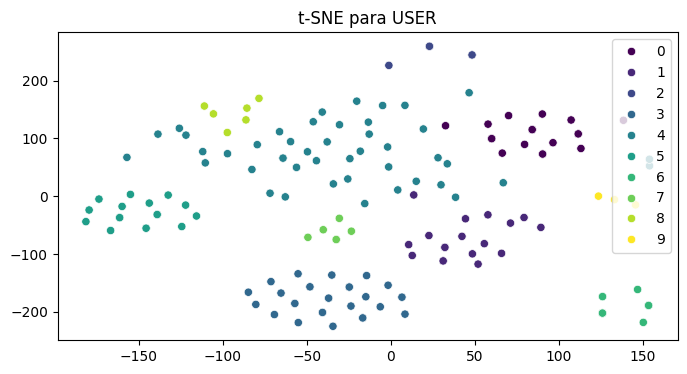

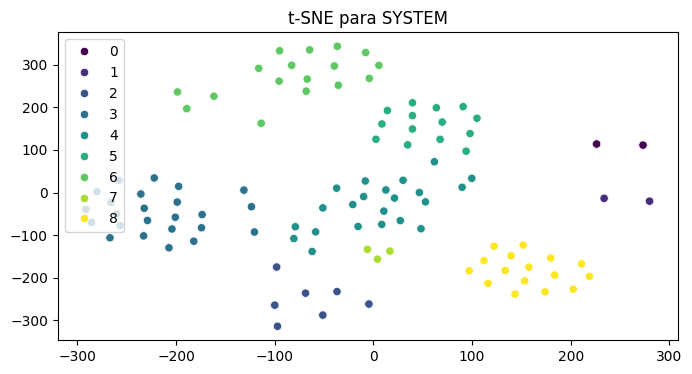

In [38]:
def apply_tsne(vectors, perplexity=30, n_iter=1000):
    tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=2)
    tsne_result = tsne_model.fit_transform(vectors)
    return tsne_result


nomeFichtsneSystem =  f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_tsne_system.pkl'
nomeFichtsneUser = f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_tsne_user.pkl'

# Aplicar t-SNE aos vetores
if not os.path.exists(nomeFichtsneSystem) or not os.path.exists(nomeFichtsneUser):
    tsne_result_user = apply_tsne(vectors_user)

    tsne_result_system = apply_tsne(vectors_system)

    with open(nomeFichtsneUser, 'wb') as file:
        pickle.dump(tsne_result_user, file)

    with open(nomeFichtsneSystem, 'wb') as file:
        pickle.dump(tsne_result_system, file)
else:
    with open(nomeFichtsneUser, 'rb') as file:
        tsne_result_user = pickle.load(file)

    with open(nomeFichtsneSystem, 'rb') as file:
        tsne_result_system = pickle.load(file)

# Criar gr√°fico de dispers√£o para o utilizador
plt.figure(figsize=(8, 4))
sns.scatterplot(x=tsne_result_user[:, 0], y=tsne_result_user[:, 1], hue=y_predicted_user, palette="viridis", legend="full")
plt.title("t-SNE para USER")
plt.show()

# Criar gr√°fico de dispers√£o para o sistema
plt.figure(figsize=(8, 4))
sns.scatterplot(x=tsne_result_system[:, 0], y=tsne_result_system[:, 1], hue=y_predicted_system, palette="viridis", legend="full")
plt.title("t-SNE para SYSTEM")
plt.show()


#### Dados com PCA aplicado

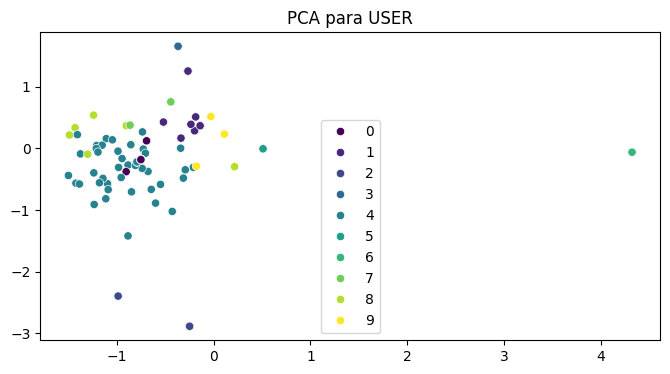

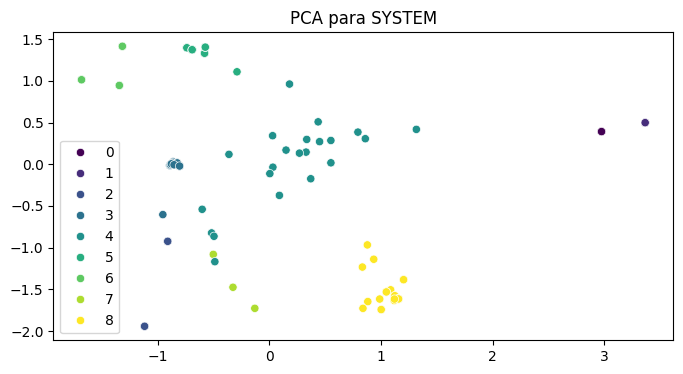

In [39]:
def apply_pca(vectors, n_components=2):
    pca_model = PCA(n_components=n_components, random_state=2)
    pca_result = pca_model.fit_transform(vectors)
    return pca_result

nomeFichpcaSystem =  f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_pca_system.pkl'
nomeFichpcaUser = f'{MODEL_ML}_{algorithm}_{filename.split(".")[0]}_{metric_to_optimize}_{str(id_max)}_pca_user.pkl'

# Aplicar PCA aos vetores
if not os.path.exists(nomeFichpcaSystem) or not os.path.exists(nomeFichpcaUser):
    pca_result_user = apply_pca(vectors_user)

    pca_result_system = apply_pca(vectors_system)

    with open(nomeFichpcaUser, 'wb') as file:
        pickle.dump(pca_result_user, file)

    with open(nomeFichpcaSystem, 'wb') as file:
        pickle.dump(pca_result_system, file)
else:
    with open(nomeFichpcaUser, 'rb') as file:
        pca_result_user = pickle.load(file)

    with open(nomeFichpcaSystem, 'rb') as file:
        pca_result_system = pickle.load(file)


# Criar gr√°fico de dispers√£o USER
plt.figure(figsize=(8, 4))
sns.scatterplot(x=pca_result_user[:, 0], y=pca_result_user[:, 1], hue=y_predicted_user, palette="viridis", legend="full")
plt.title("PCA para USER")
plt.show()

# Criar gr√°fico de dispers√£o SYSTEM
plt.figure(figsize=(8, 4))
sns.scatterplot(x=pca_result_system[:, 0], y=pca_result_system[:, 1], hue=y_predicted_system, palette="viridis", legend="full")
plt.title("PCA para SYSTEM")
plt.show()


## Teste

### Formata√ß√£o dos dados e vetoriza√ß√£o

In [40]:
#AVALIA√á√ÉO
if filename[-4:] == ".csv":
  dados_test = pd.read_csv(filename_test, sep=';')
else:
  dados_test = pd.read_excel(filename_test)

normalized_df_test = normalize_dataset(dados_test, regex=True, removeGreetings=False, speaker='both')
normalized_df_user_test = normalized_df_test[normalized_df_test['Speaker'] == 'USER']
normalized_df_system_test = normalized_df_test[normalized_df_test['Speaker'] == 'SYSTEM']


file_path_system = os.path.abspath(nomeFichPickleSystem_silh)
file_path_user = os.path.abspath(nomeFichPickleUser_silh)

# Carregar o modelo
AlgoSystem = joblib.load(file_path_system)
AlgoUser = joblib.load(file_path_user)
print(AlgoSystem)
#USER
model = SentenceTransformer(MODEL_ML)

names_user = names[:n_clusters_user]
utterances_user_test = normalized_df_user_test["utterance"].tolist()
dados_codificados_user_test = model.encode(utterances_user_test)

# Kmeans
y_predicted_user_test = AlgoUser.predict(dados_codificados_user_test)
# DBSCAN
#y_predicted_user_test = dbscan_predict(utterances_user, AlgoUser, dados_codificados_user_test)

if acts:
  df_user_test = normalized_df_user_test[["dialogue_id", "turn_id",'Speaker', "trueLabel"]].copy()
else:
  # Se n√£o houver dialog acts
  df_user_test = normalized_df_user_test[["dialogue_id", "turn_id",'Speaker']].copy()
df_user_test["clusters_user"] = y_predicted_user_test

#SYSTEM
names_system = names[n_clusters_user:-2]
utterances_system_test = normalized_df_system_test["utterance"].tolist()
dados_codificados_system_test = model.encode(utterances_system_test)

# Kmeans
y_predicted_system_test = AlgoSystem.predict(dados_codificados_system_test)
# DBSCAN
#y_predicted_system_test = dbscan_predict(utterances_system, AlgoSystem, dados_codificados_system_test)
if acts:
  df_system_test = normalized_df_system_test[["dialogue_id", "turn_id",'Speaker', "trueLabel"]].copy()
else:
  # Se n√£o houver dialog acts
  df_system_test = normalized_df_system_test[["dialogue_id", "turn_id",'Speaker']].copy()
df_system_test["clusters_system"] = y_predicted_system_test


KMeans(init='random', n_clusters=9, n_init=26, random_state=2,
       tol=0.07466639355989335)


In [41]:
# Final

df_final_test = pd.concat([df_user_test, df_system_test])

df_final_test['clusters_final'] = df_final_test['clusters_user'].fillna(0) + df_final_test['clusters_system'].fillna(0)
df_final_test['sequence'] = range(len(df_final_test))

# Ordena o DataFrame com base na coluna 'sequence'
df_final_test.sort_values(by=['sequence'], inplace=True)

# Remove a coluna 'sequence' ap√≥s a ordena√ß√£o, se n√£o for mais necess√°ria
df_final_test.drop(columns=['sequence'], inplace=True)

# Converter a coluna 'n_clusters_final' para o tipo inteiro
df_final_test['clusters_final'] = df_final_test['clusters_final'].astype(int)
# df_final_test.to_csv("df_final_test.csv")

print(names)
print(names_user)
print(names_system)

# df_final_test.to_csv("df_final_test.csv")

['user -> estado encomeda estado (25)\nAvg(Turns) 7.40 ¬± 5.39\nTime(Start) - Avg 651.92s ¬± 2874.42s | Mdn 36.00s (IQR = 8.00s-104.00s)\nTime(Previous) - Avg 7.88s ¬± 7.30s | Mdn 6.00s (IQR = 5.00s-9.00s)', 'user -> sim ol√° sim (19)\nAvg(Turns) 11.16 ¬± 5.13\nTime(Start) - Avg 861.32s ¬± 3290.61s | Mdn 103.00s (IQR = 48.50s-139.00s)\nTime(Previous) - Avg 14.26s ¬± 18.62s | Mdn 8.00s (IQR = 6.50s-13.50s)', 'user -> temas outros temas (18)\nAvg(Turns) 10.44 ¬± 5.60\nTime(Start) - Avg 72.78s ¬± 57.50s | Mdn 86.00s (IQR = 15.00s-111.75s)\nTime(Previous) - Avg 6.72s ¬± 5.36s | Mdn 5.00s (IQR = 4.00s-7.00s)', 'user -> compreendi compreendi compreendi (29)\nAvg(Turns) 2.97 ¬± 1.97\nTime(Start) - Avg 524.76s ¬± 2675.15s | Mdn 7.00s (IQR = 3.00s-27.00s)\nTime(Previous) - Avg 511.24s ¬± 2656.75s | Mdn 5.00s (IQR = 3.00s-9.00s)', 'user -> encomendar livros (46)\nAvg(Turns) 11.30 ¬± 7.44\nTime(Start) - Avg 405.83s ¬± 2121.27s | Mdn 91.00s (IQR = 40.00s-146.00s)\nTime(Previous) - Avg 24.02s ¬± 21

### Obter valores de m√©tricas

In [42]:
for i, t in enumerate(threshold):
    dot_filename = f'{Path(filename).stem}_{algorithm}_{metric_to_optimize}_{str(id_max)}_graph.dot'

    nomeFichParSystem = f'{Path(filename).stem}_{metric_to_optimize}_{algorithm}_{str(id_max)}_param_{t}.txt'

    v_measure_test_user = 0
    v_measure_train_user = 0
    v_measure_test_system = 0
    v_measure_train_system = 0
    v_measure_test = 0
    v_measure_train = 0
    accuracy = 0

    (flow,) = pydot.graph_from_dot_file(dot_filename)

    # matrix.to_csv("matrix.csv")
    accuracy = calcular_accuracy_transicoes(df_final_test, flow, names_user, names_system)
    print("ACCURACY", accuracy)

    df_final_test_clear = df_final_test.copy()

    def modify_value(row):
        if row['Speaker'] == 'SYSTEM':
            return 's' + str(row['clusters_final'])
        elif row['Speaker'] == 'USER':
            return 'u' + str(row['clusters_final'])
        else:
            return row['clusters_final']

    def modify_true_value(row):
        if row['Speaker'] == 'SYSTEM':
            return 's' + str(row['trueLabel'])
        elif row['Speaker'] == 'USER':
            return 'u' + str(row['trueLabel'])
        else:
            return row['trueLabel']

    def modify_train_value(row):
        if row['Speaker'] == 'SYSTEM':
            return 's' + str(row['n_clusters_final'])
        elif row['Speaker'] == 'USER':
            return 'u' + str(row['n_clusters_final'])
        else:
            return row['n_clusters_final']


    # Apply the function to the DataFrame
    df_final_test_clear['clusters_final'] = df_final_test_clear.apply(modify_value, axis=1)
    df_final['n_clusters_final'] = df_final.apply(modify_train_value, axis=1)

    if acts:
        df_final_test_clear['trueLabel'] = df_final_test_clear.apply(modify_true_value, axis=1)
        df_final['trueLabel'] = df_final.apply(modify_true_value, axis=1)

        # User
        v_measure_test_user = metrics.v_measure_score(df_user_test['trueLabel'], df_user_test['clusters_user'], beta = beta)
        v_measure_train_user = metrics.v_measure_score(normalized_df_user['trueLabel'], normalized_df_user['cluster_user'], beta = beta)

        # System
        v_measure_test_system = metrics.v_measure_score(df_system_test['trueLabel'], df_system_test['clusters_system'], beta = beta)
        v_measure_train_system = metrics.v_measure_score(normalized_df_system['trueLabel'], normalized_df_system['cluster_system'], beta = beta)

        # Both
        v_measure_test = metrics.v_measure_score(df_final_test_clear['trueLabel'], df_final_test_clear['clusters_final'], beta = beta)
        v_measure_train = metrics.v_measure_score(df_final['trueLabel'], df_final['n_clusters_final'], beta = beta)

    # z = (x ‚Äì min(x)) / (max(x) ‚Äì min(x))
    # Silhouette Score Normalize from [-1:1] to [0:1]
    silhouette_score = (silhouette_system + silhouette_user) / 2
    silhouette_score_norm = (silhouette_score + 1) / 2

    Silhacc = (2 * accuracy * silhouette_score_norm) / (accuracy + silhouette_score_norm)

    # Davies Bouldin Score
    #davies_bouldin_score = (-davies_bouldin_user - davies_bouldin_system) / 2
    #calinski_harabasz_score = (calinski_harabasz_user + calinski_harabasz_system) / 2

    file = open(nomeFichParSystem, 'w')
    print("Clusters User: ", len(np.unique(y_predicted_user[y_predicted_user != -1])), file=file)
    print("Clusters System: ", len(np.unique(y_predicted_system[y_predicted_system != -1])), file=file)
    print("\nAccuracy: ", accuracy, file=file)
    print("\nV-measure Teste User: ", v_measure_test_user, file=file)
    print("\nV-measure Treino User: ", v_measure_train_user, file=file)
    print("\nV-measure Teste System: ", v_measure_test_system, file=file)
    print("\nV-measure Treino System: ", v_measure_train_system, file=file)
    print("\nV-measure Teste: ", v_measure_test, file=file)
    print("\nV-measure Treino: ", v_measure_train, file=file)
    #print("\nSilhouette System: ", silhouette_system, file=file)
    #print("Silhouette User: ", silhouette_user, file=file)
    #print("Silhouette: ", silhouette_score, file=file)
    #print("Davies Bouldin Score: ", davies_bouldin_score, file=file)
    #print("Calinski and Harabasz Score: ", calinski_harabasz_score, file=file)
    #print("\nResult: ", result[i], file=file)
    print("Silhacc: ", Silhacc, file=file)

    file.close()


num_dialogos 31
num_utterances 407
0 0 0
ACCURACY 0.0
